# Bank Account Assessment Project Part 3
Logistic Regression details and characteristics exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# command exclusive to Jupyter notebooks
%matplotlib inline   
import matplotlib as mpl
import seaborn as sns
plt.rcParams["figure.dpi"] = 400
df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [2]:
# list all the columns from the df 
features_response = df.columns.tolist()
print(features_response[:5])
print(features_response[-5:])

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']
['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']


In [3]:
# remove itens that were incorrectly inputed in the df 
# such as PAY_2 to PAY_6, gender (requested by client), etc
items_to_remove = ["ID", "SEX", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "EDUCATION_CAT",
                   "graduate school", "high school", "none", "others", "university"]

In [4]:
# using list comprehension to create list with the import characteristics only
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
# create linear correlation matrix
# when the correlation is negative, it means that there is an inverse linear relation
corr = df[features_response].corr()
corr.iloc[:5, :5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<Axes: >

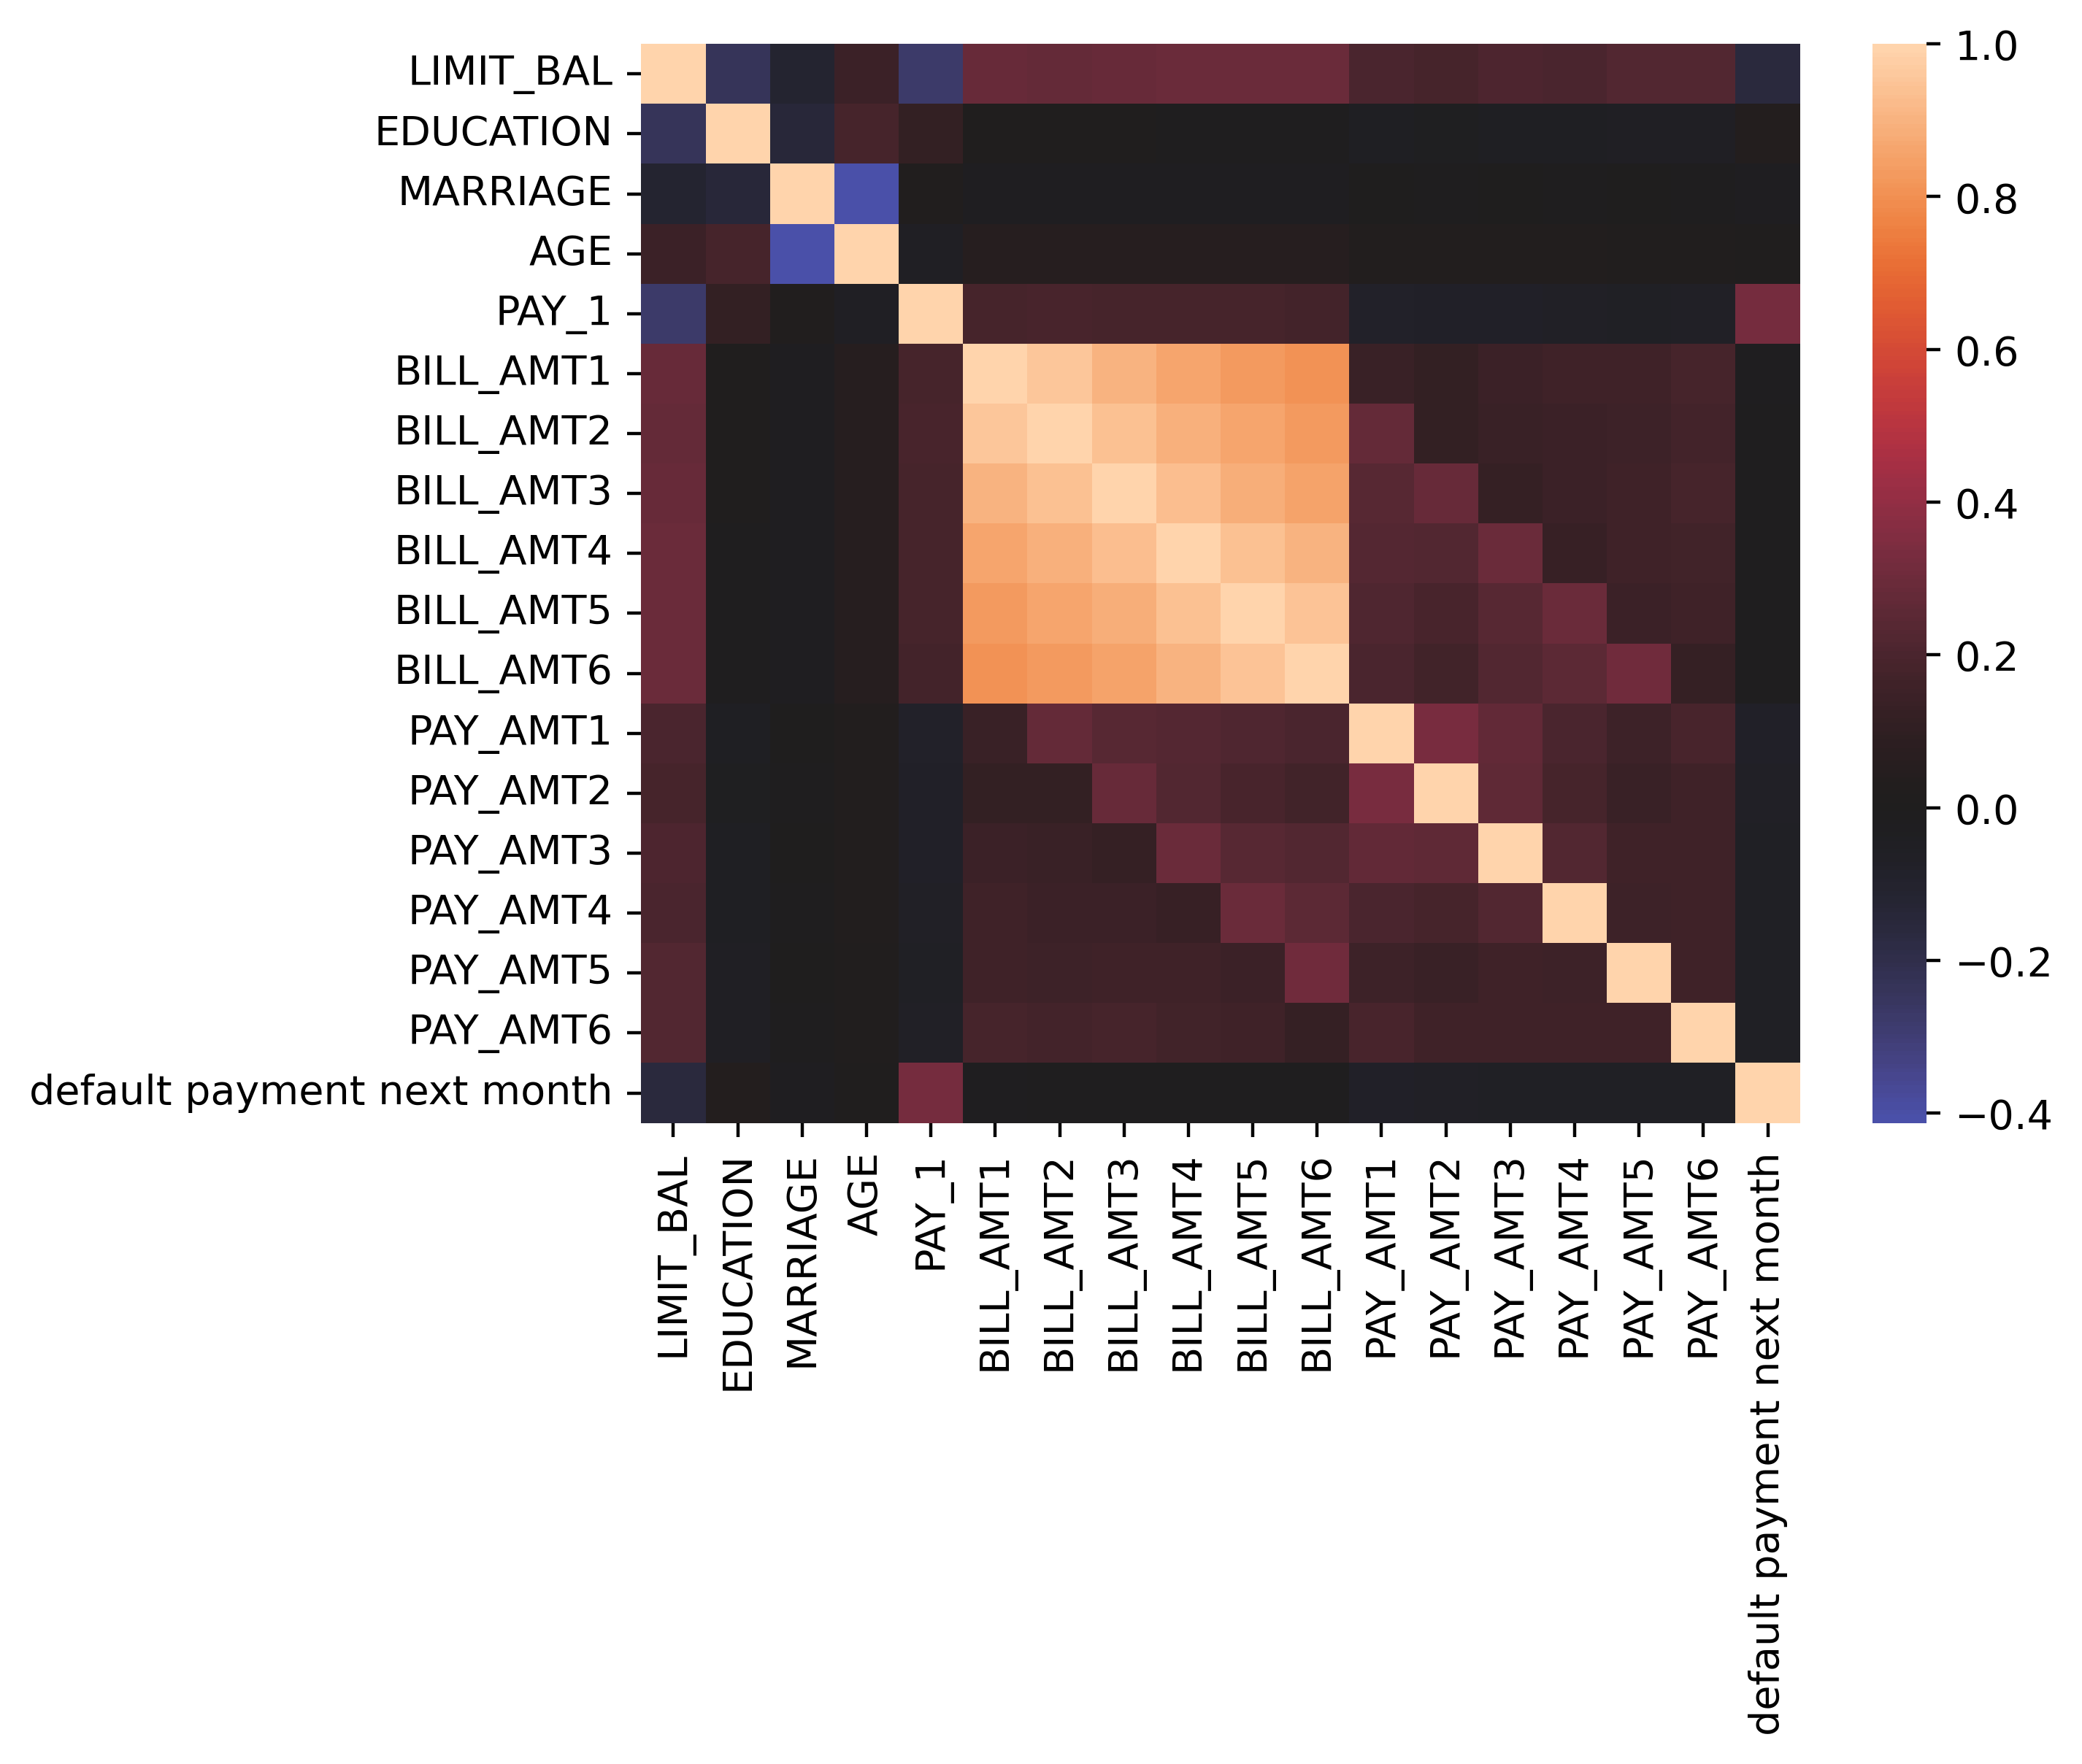

In [6]:
# create correlation plot with seaborn
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           center=0)

## F test

In [7]:
# separate data
x = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:, -1].values
print(x.shape, y.shape)

(26664, 17) (26664,)


In [8]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(x, y)

In [9]:
# F ANOVA test results
# as F statistic value increases when the p-value becomes smaller
f_test_df = pd.DataFrame({"Feature": features_response[:-1],
                         "F statistic": f_stat,
                         "p value": f_p_value})
f_test_df.sort_values("p value")

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [10]:
# selecting 20% of the characteristics with greater F statistic
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif, percentile=20)
selector.fit(x, y)

SelectPercentile(percentile=20)

In [11]:
best_feature_index = selector.get_support()
best_feature_index

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [12]:
# remove variable of interest "default payment next month"
features = features_response[:-1]  
print(features)

best_features = [features[counter] for counter in range(len(features)) if best_feature_index[counter]]
best_features

['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [13]:
overall_default_rate = df["default payment next month"].mean()
overall_default_rate

0.2217971797179718

In [14]:
group_by_pay_mean_y = df.groupby("PAY_1").agg({"default payment next month":np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


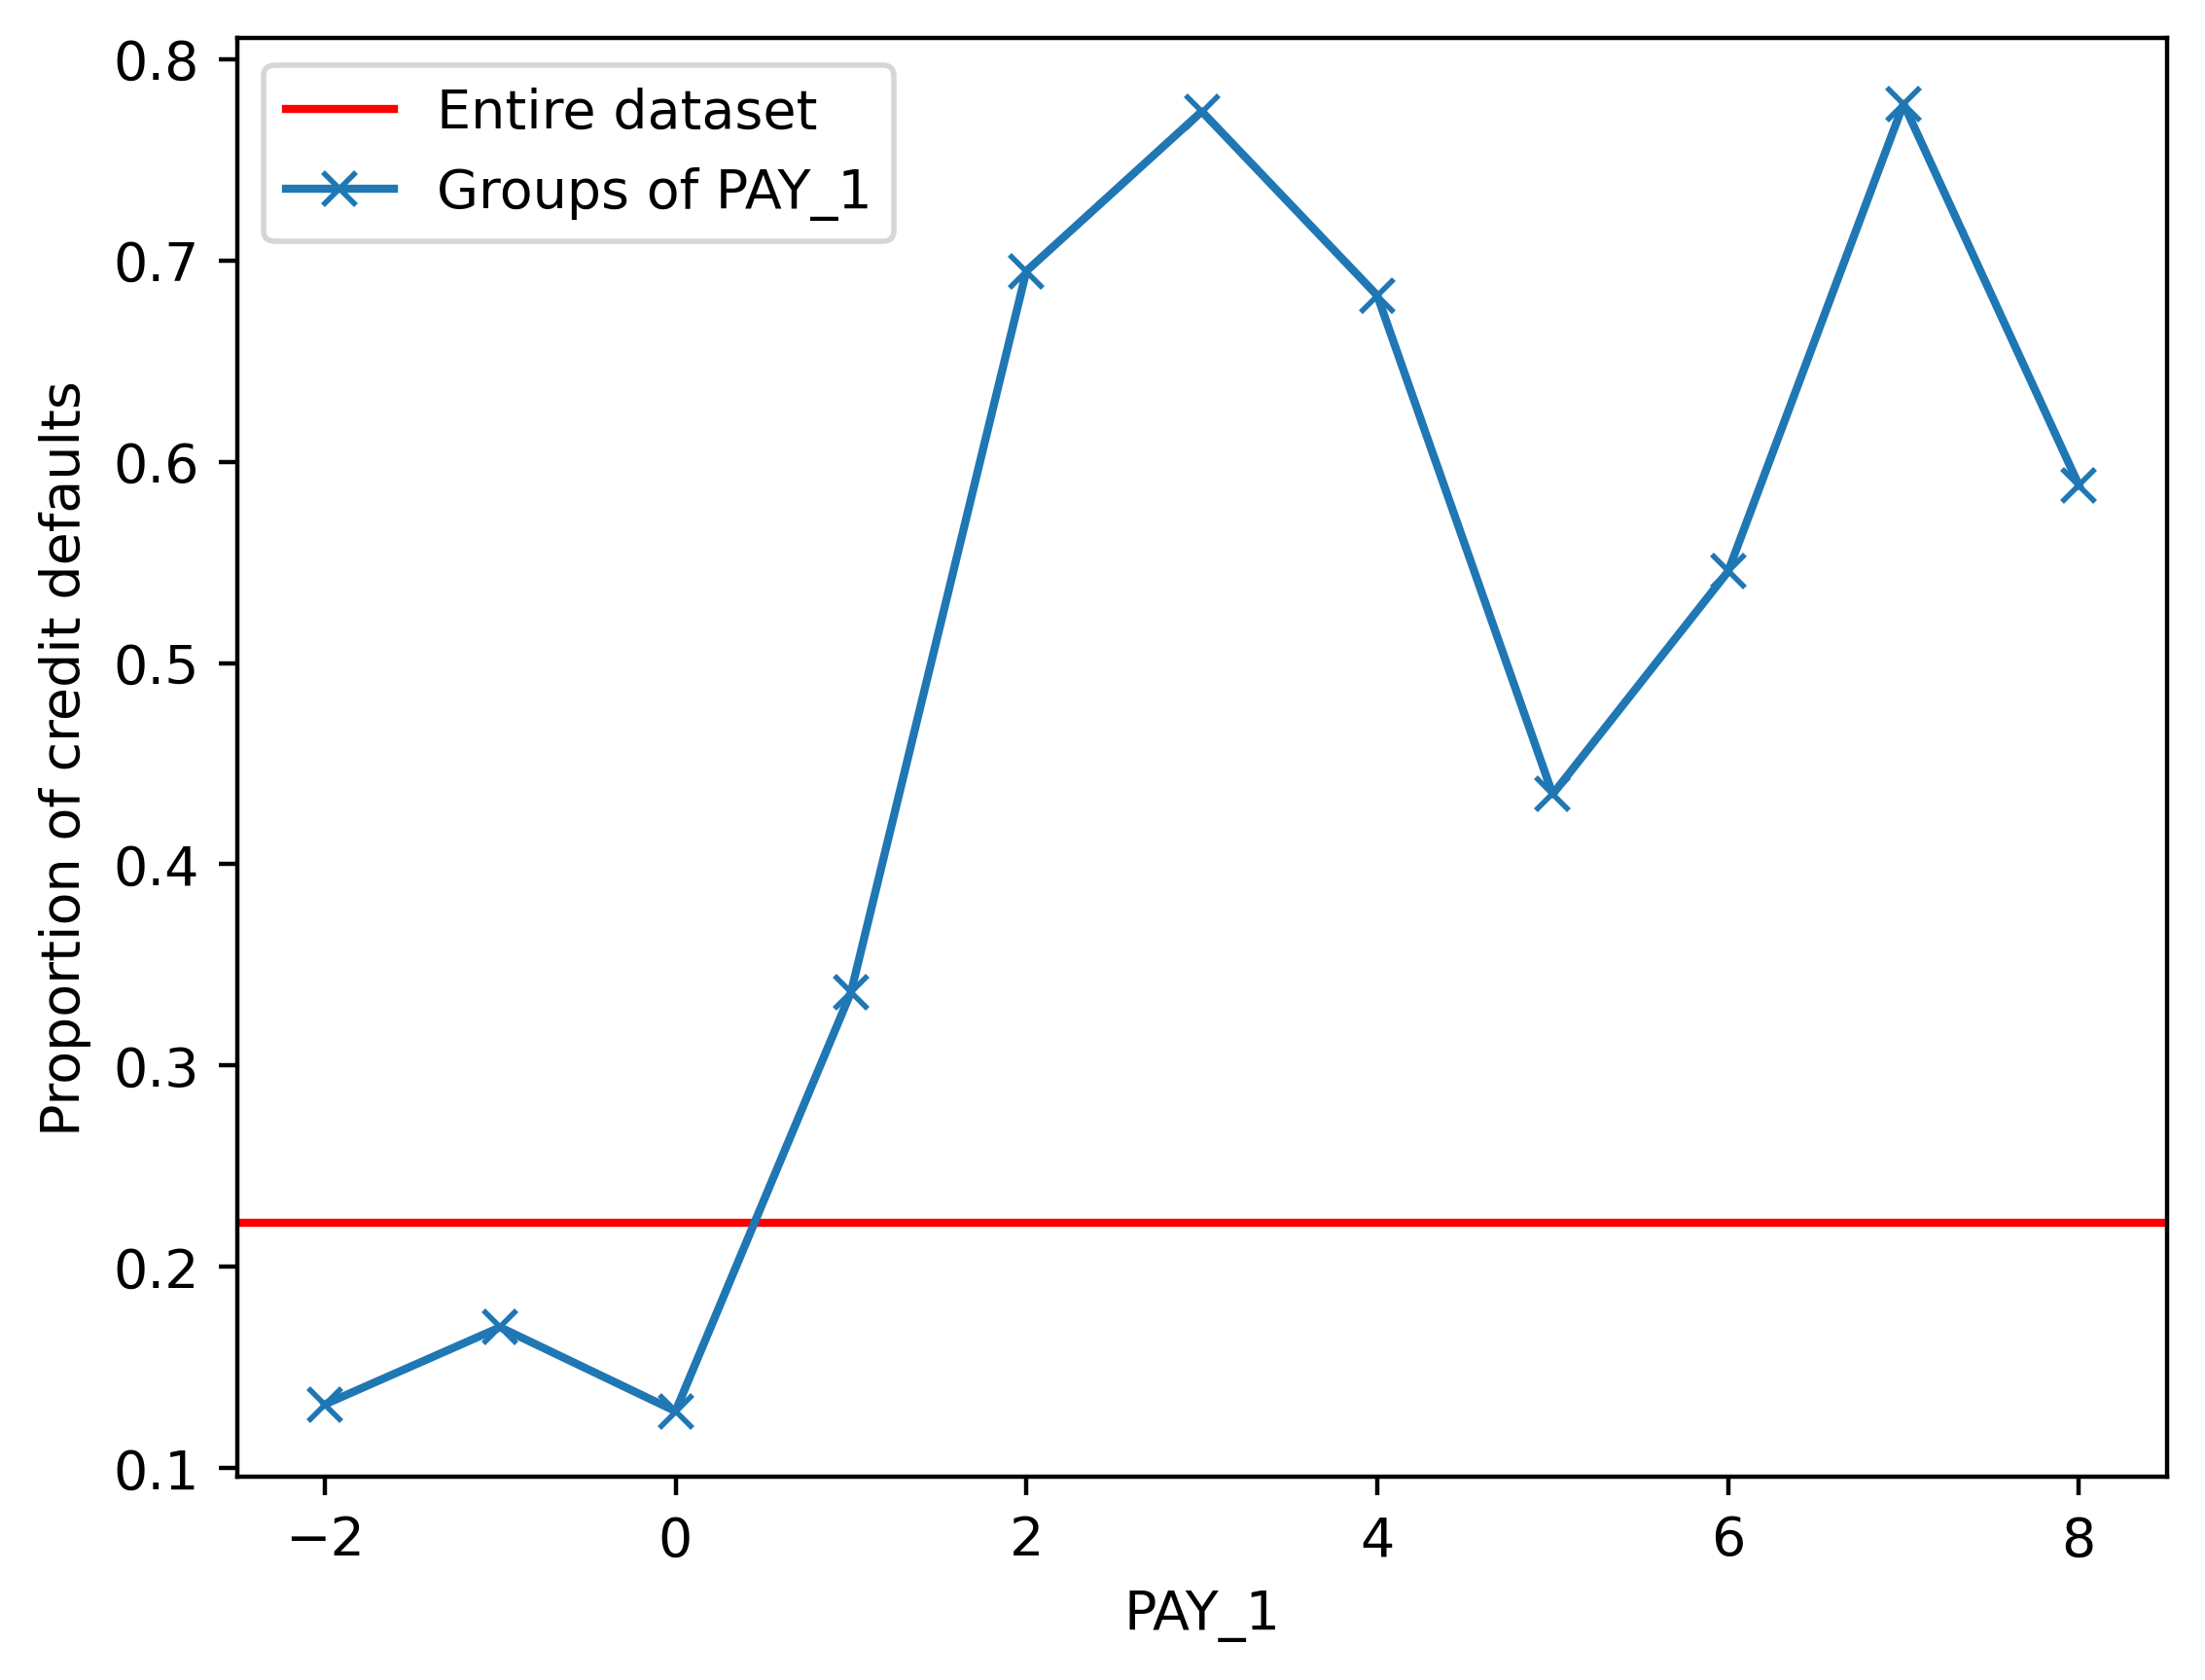

In [15]:
axes = plt.axes()
axes.axhline(overall_default_rate, color="red")
group_by_pay_mean_y.plot(marker="x", legend="False", ax=axes)
axes.set_ylabel("Proportion of credit defaults")
axes.legend(["Entire dataset", "Groups of PAY_1"])

Text(0.5, 1.0, 'Credit limtis by response variable')

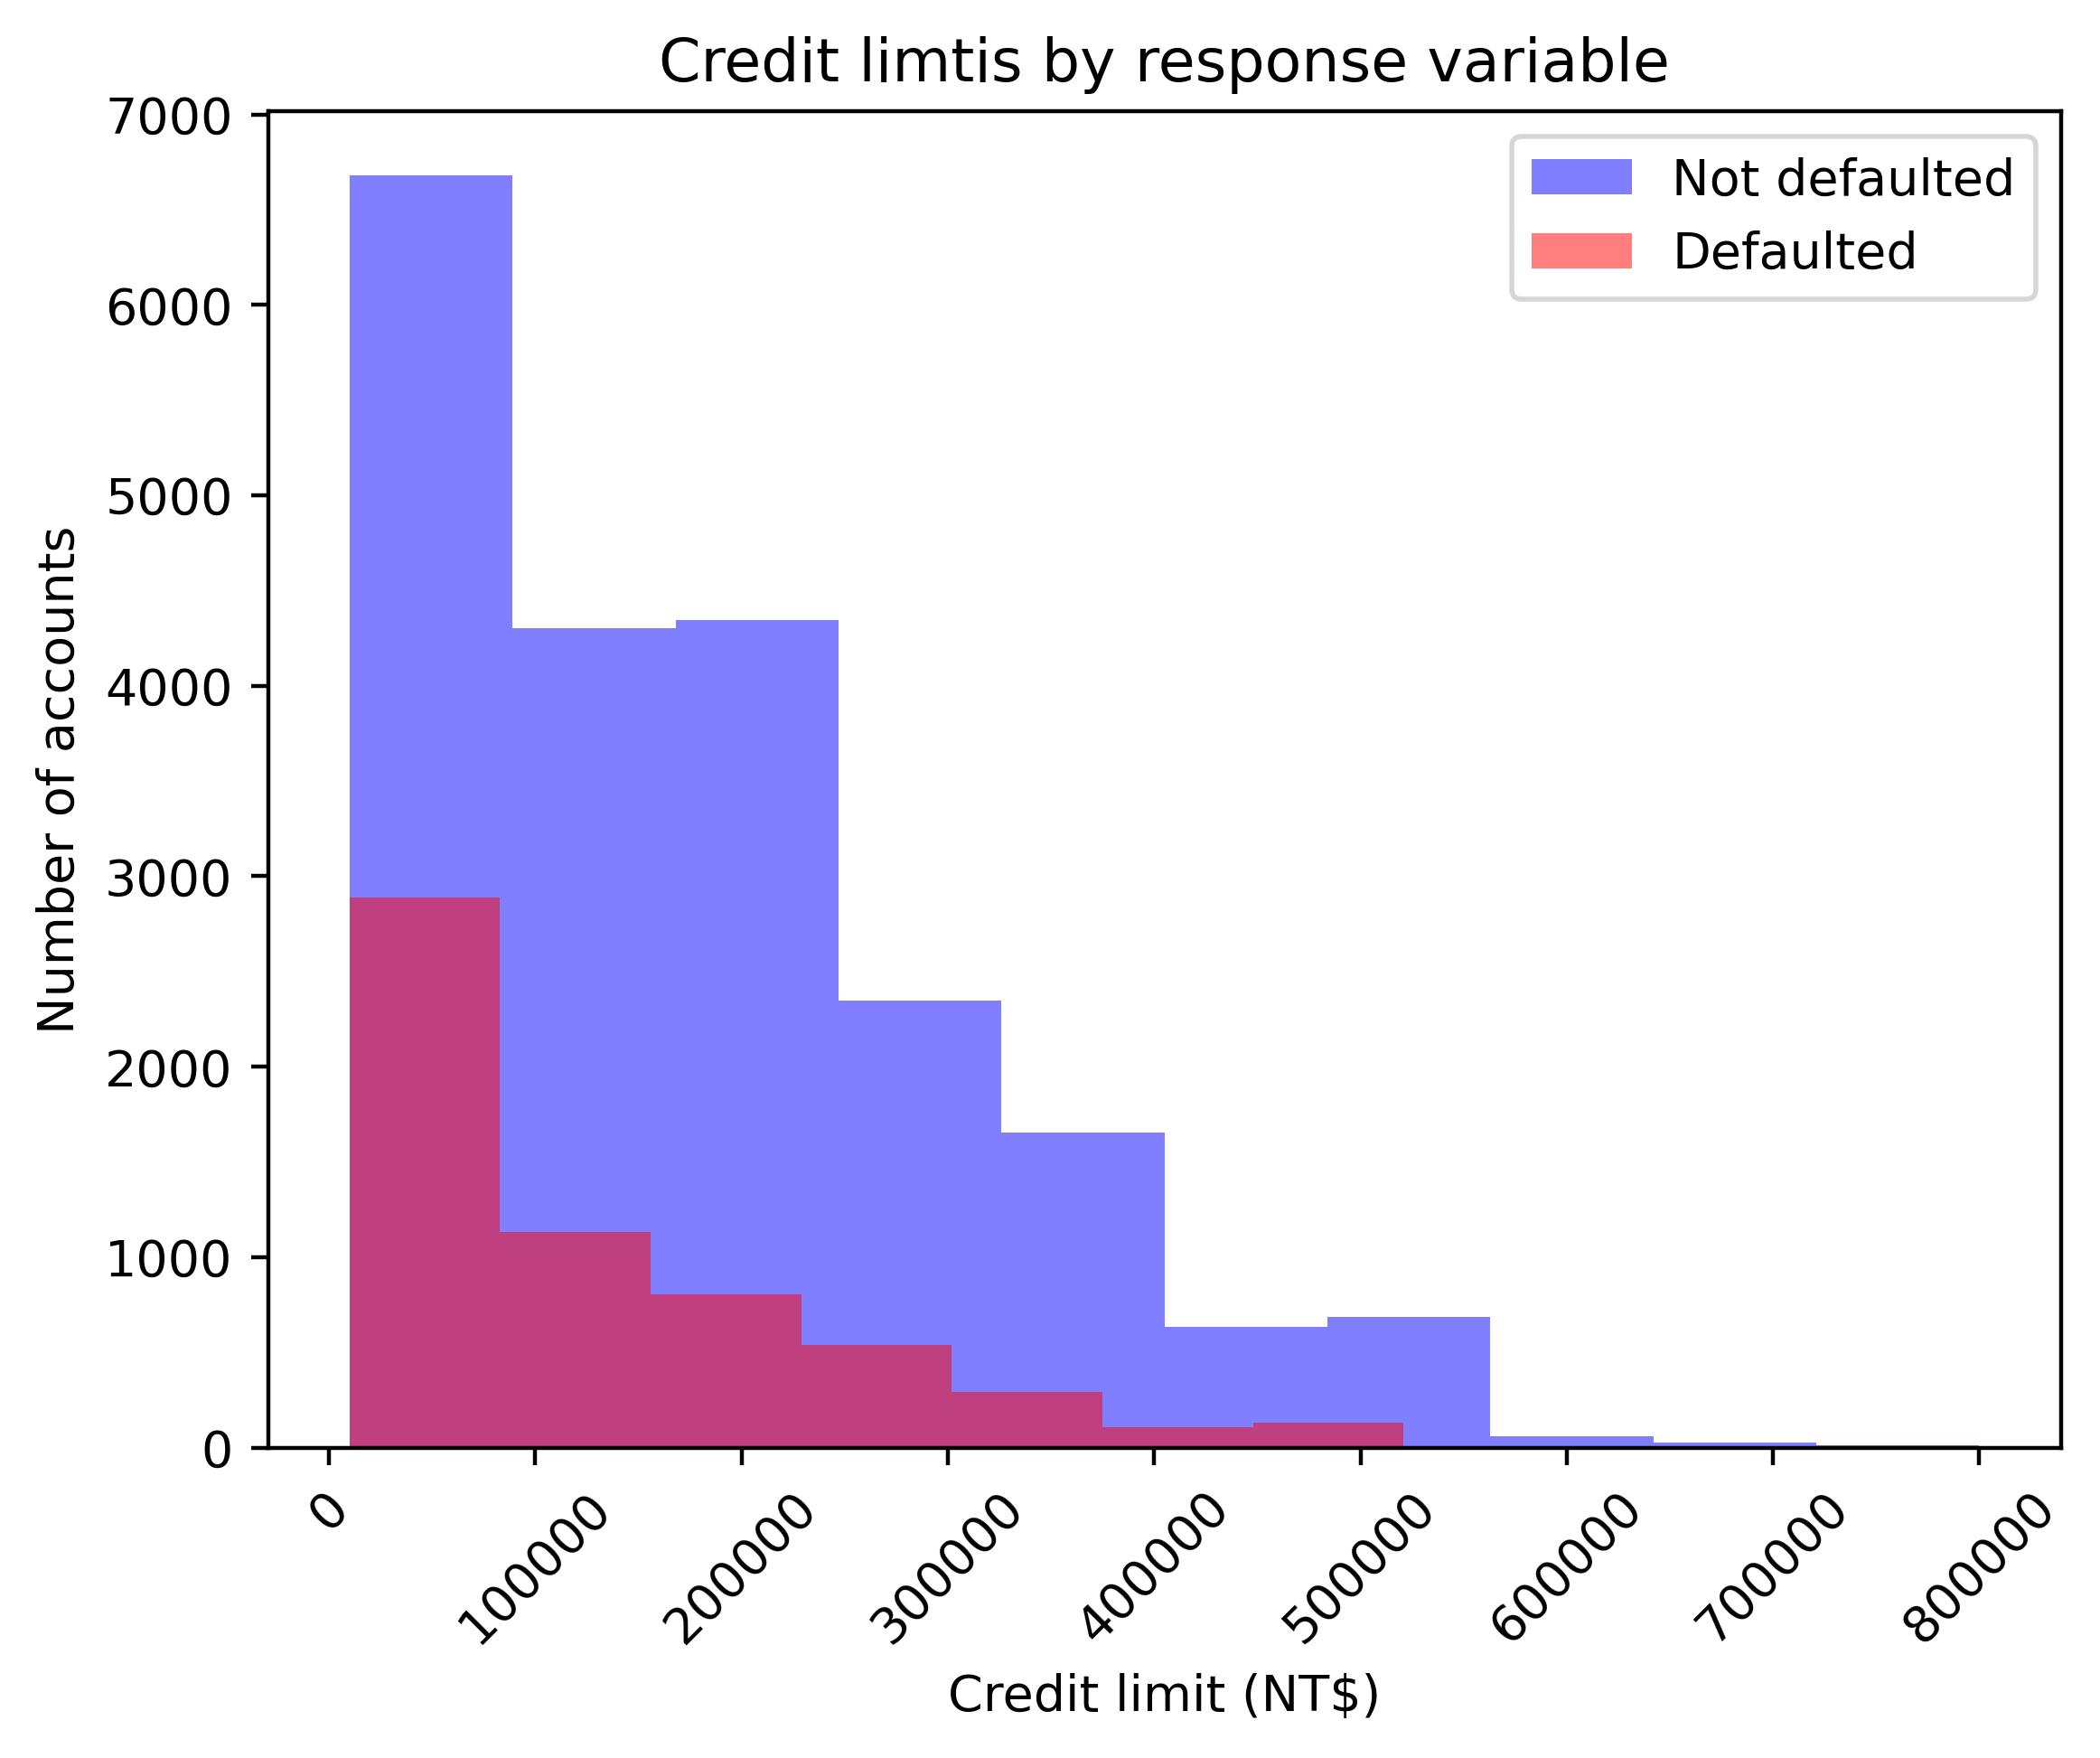

In [16]:
# using LIMIT_BAL
pos_mask = y == 1
neg_mask = y == 0

axes = plt.axes()
axes.hist(df.loc[neg_mask, "LIMIT_BAL"], alpha=0.5, color="blue")
axes.hist(df.loc[pos_mask, "LIMIT_BAL"], alpha=0.5, color="red")
axes.tick_params(axis="x", labelrotation=45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Number of accounts")
axes.legend(["Not defaulted", "Defaulted"])
axes.set_title("Credit limtis by response variable")

In [17]:
print(df["LIMIT_BAL"].max())

bin_edges = list(range(0, 850000, 50000))
bin_edges[-1]

800000


800000

C:\Users\User\AppData\Local\Temp\ipykernel_10372\3951929079.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

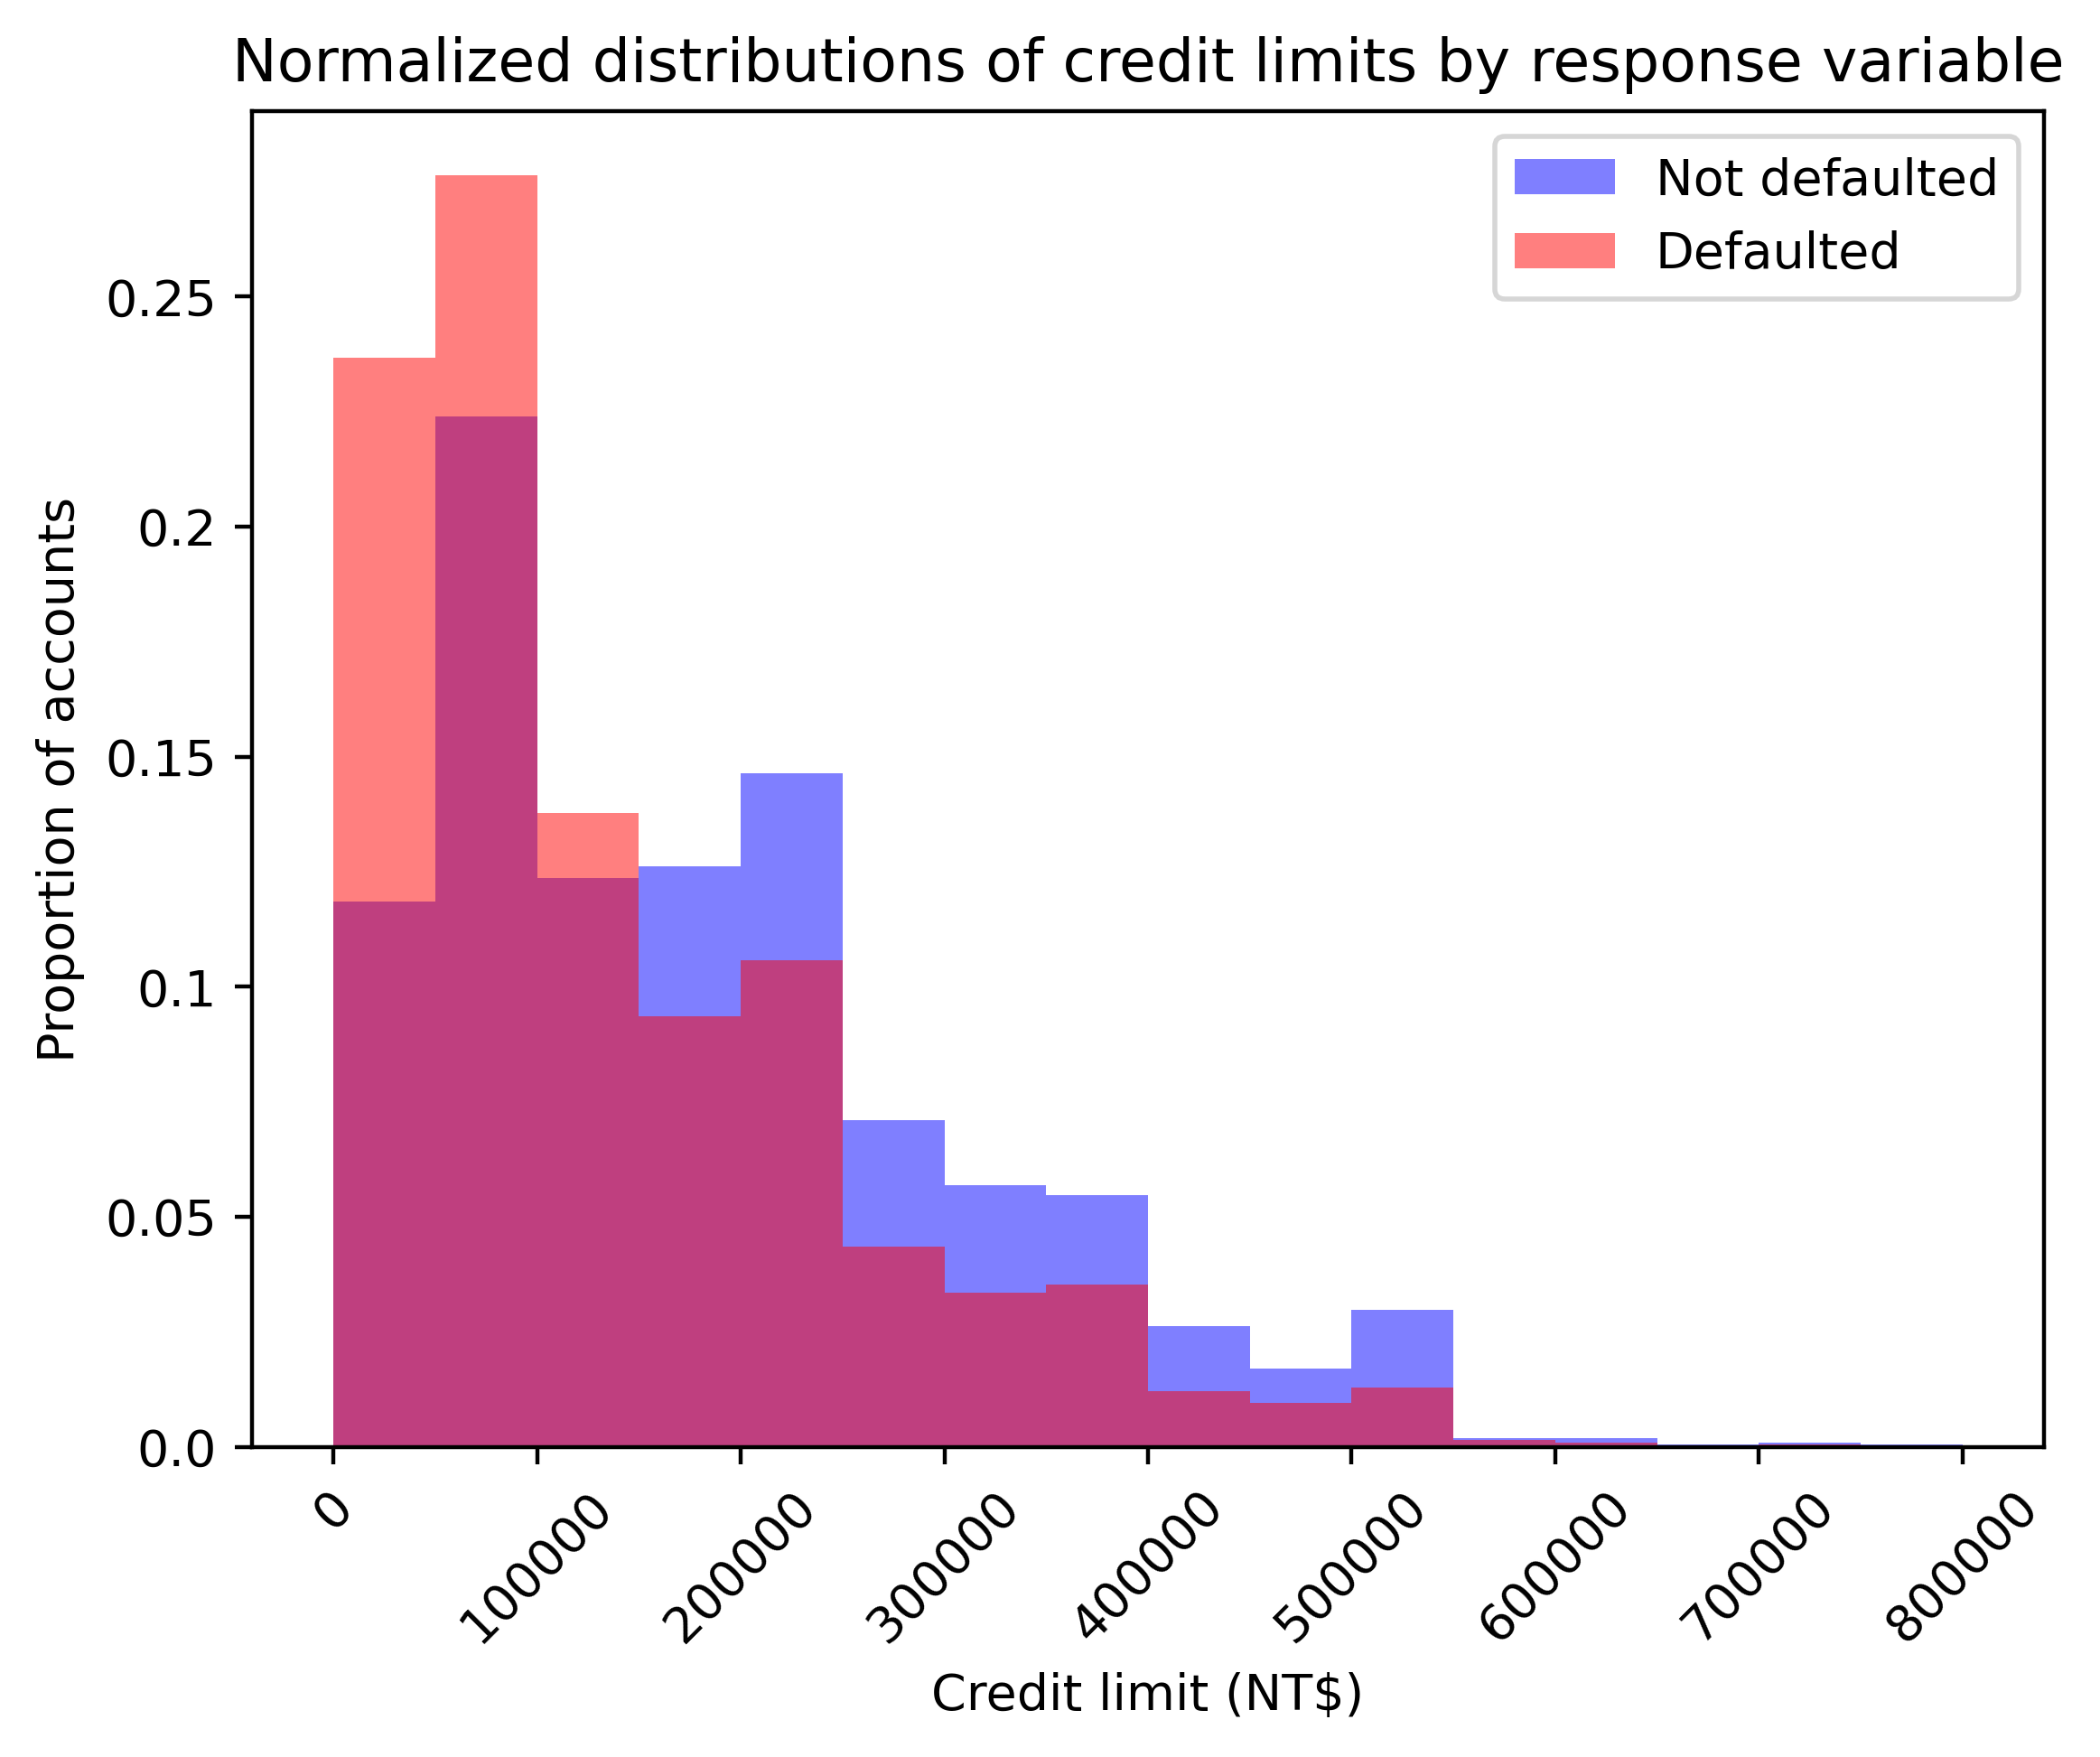

In [18]:
mpl.rcParams["figure.dpi"] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, "LIMIT_BAL"], bins=bin_edges,
          alpha=0.5, density=True, color="blue")
axes.hist(df.loc[pos_mask, "LIMIT_BAL"], bins=bin_edges,
          alpha=0.5, density=True, color="red")
axes.tick_params(axis="x", labelrotation=45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Proportion of accounts")
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(["Not defaulted", "Defaulted"])
axes.set_title("Normalized distributions of credit limits by response variable")

## Sigmoid function

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


Text(0.5, 1.0, 'Plot of $e^X$')

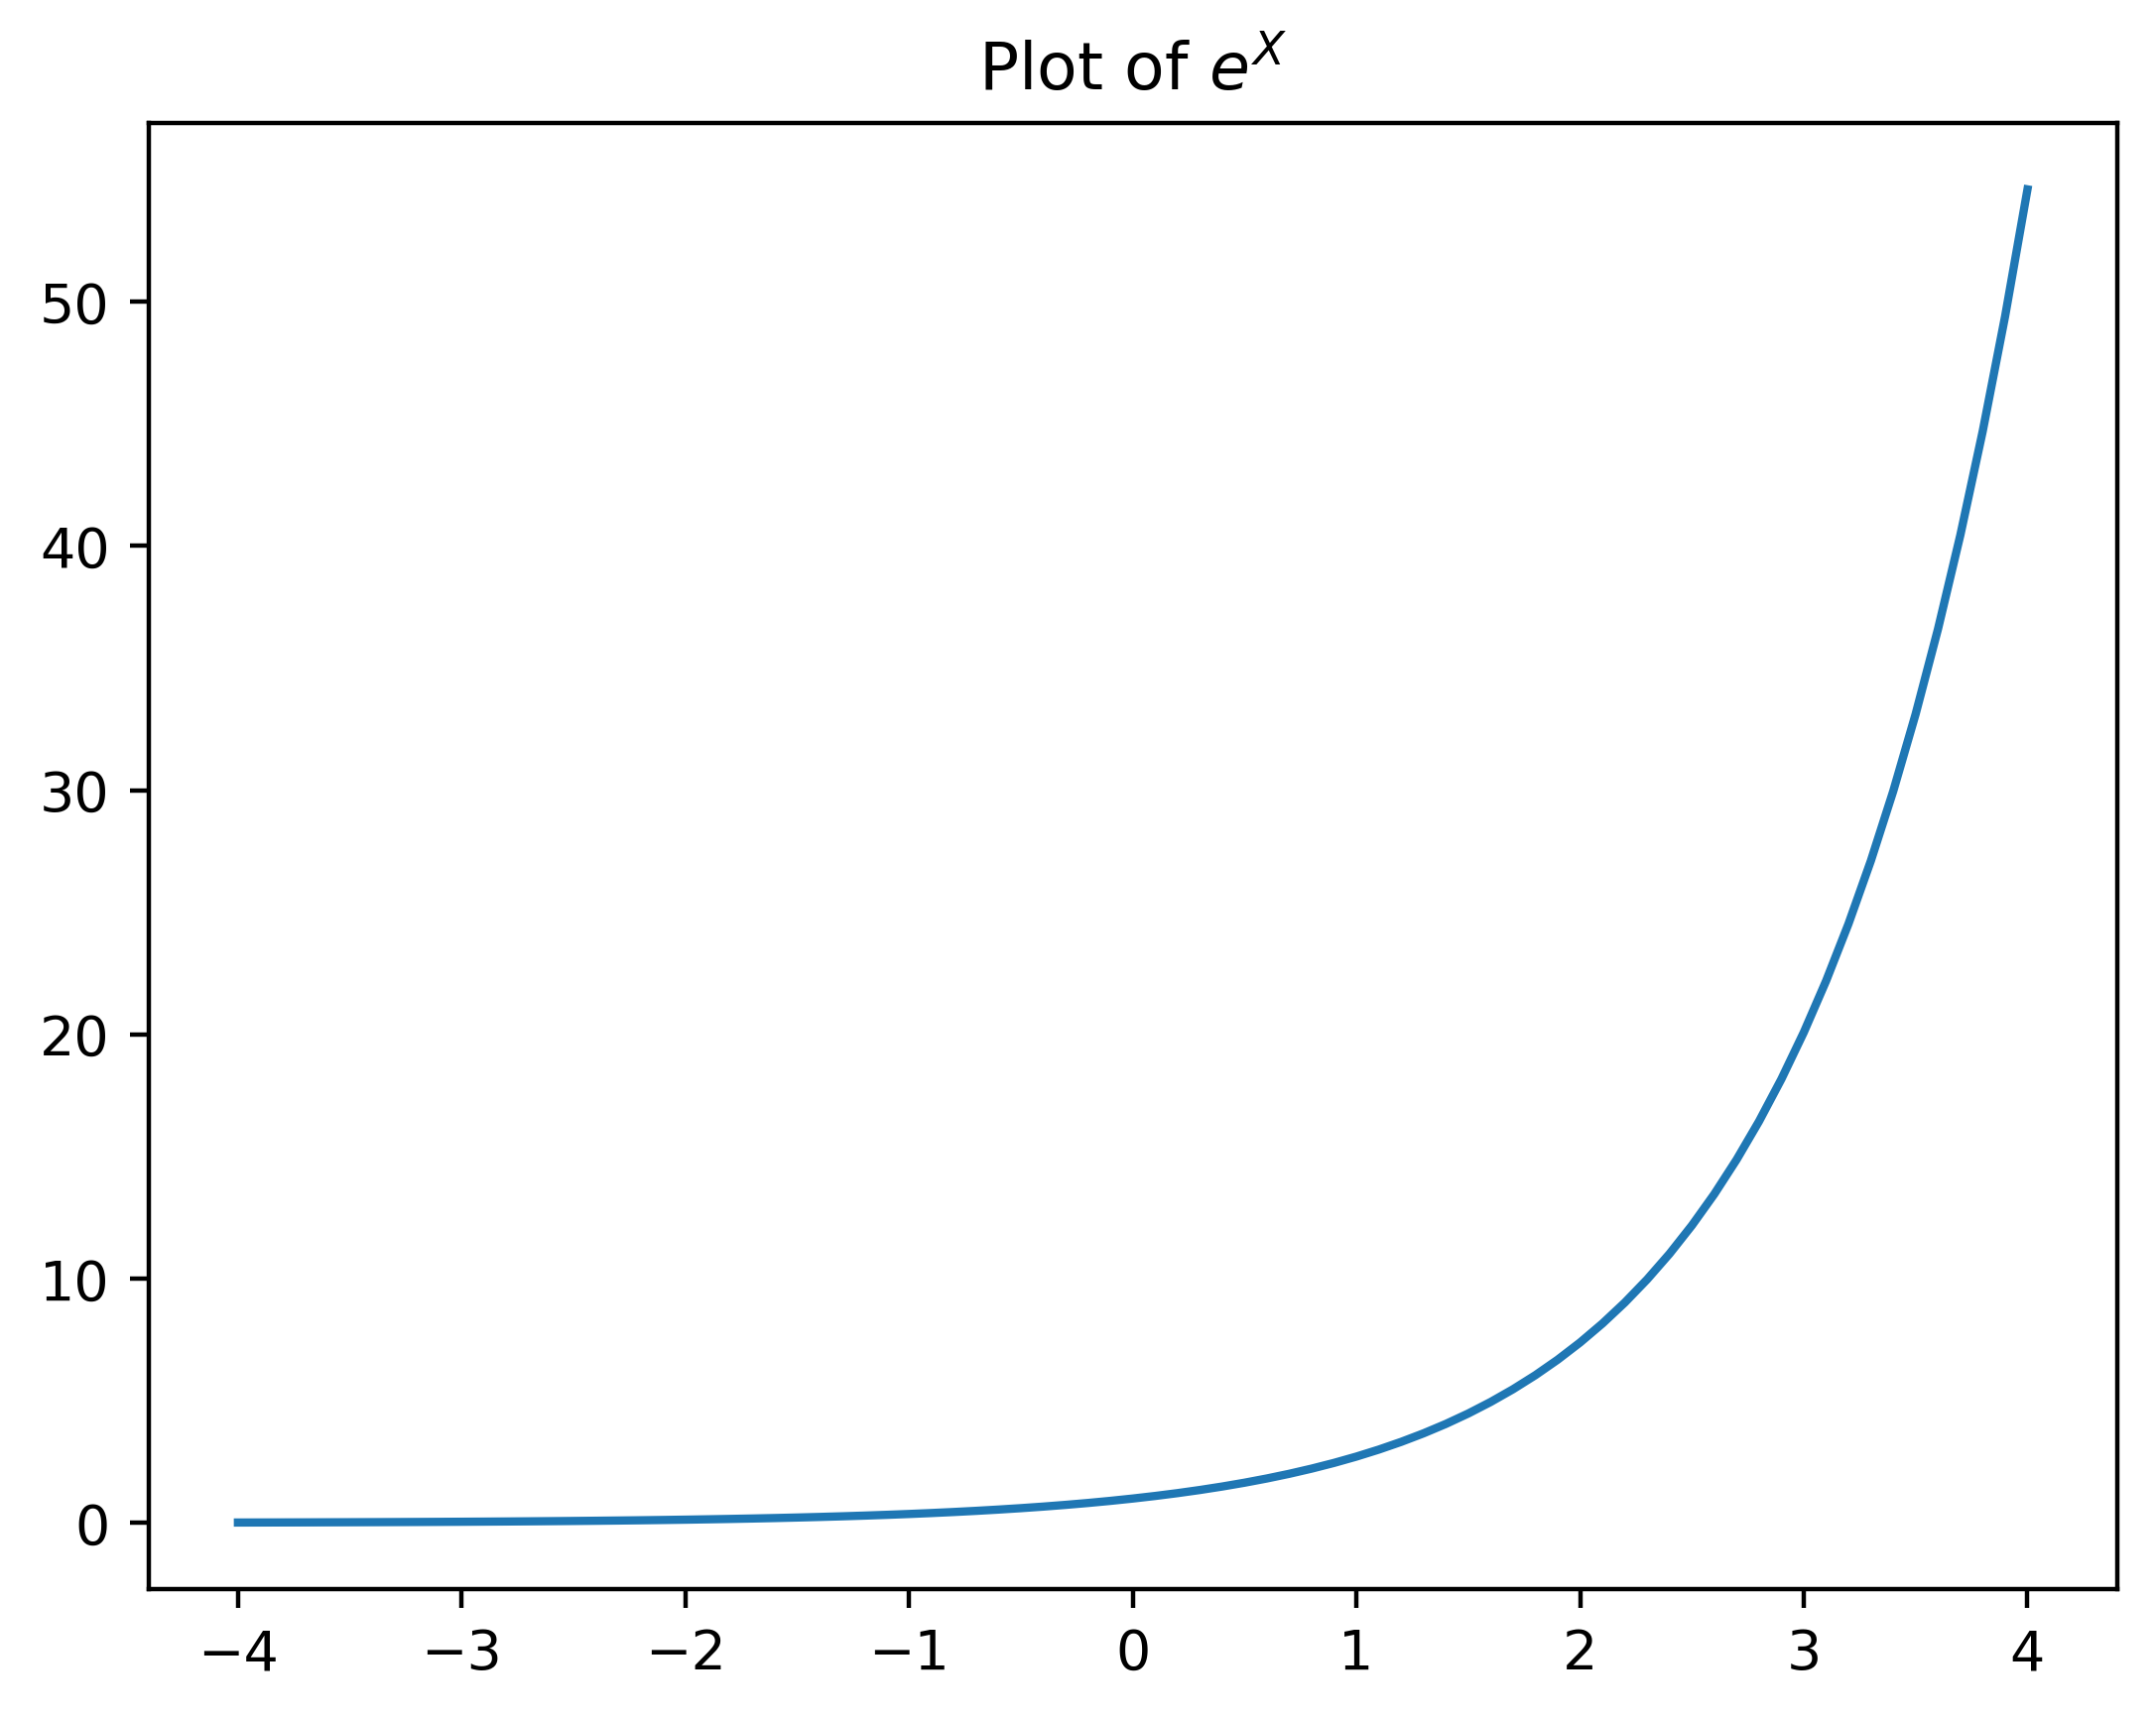

In [22]:
# plot of e^x
# this function is never negative
x_exp = np.linspace(-4, 4, 81)
print(x_exp[:5])
print(x_exp[-5:])

y_exp = np.exp(x_exp)
plt.plot(x_exp, y_exp)
plt.title("Plot of $e^X$")

Text(0.5, 1.0, 'Plot of $e^{-x}$')

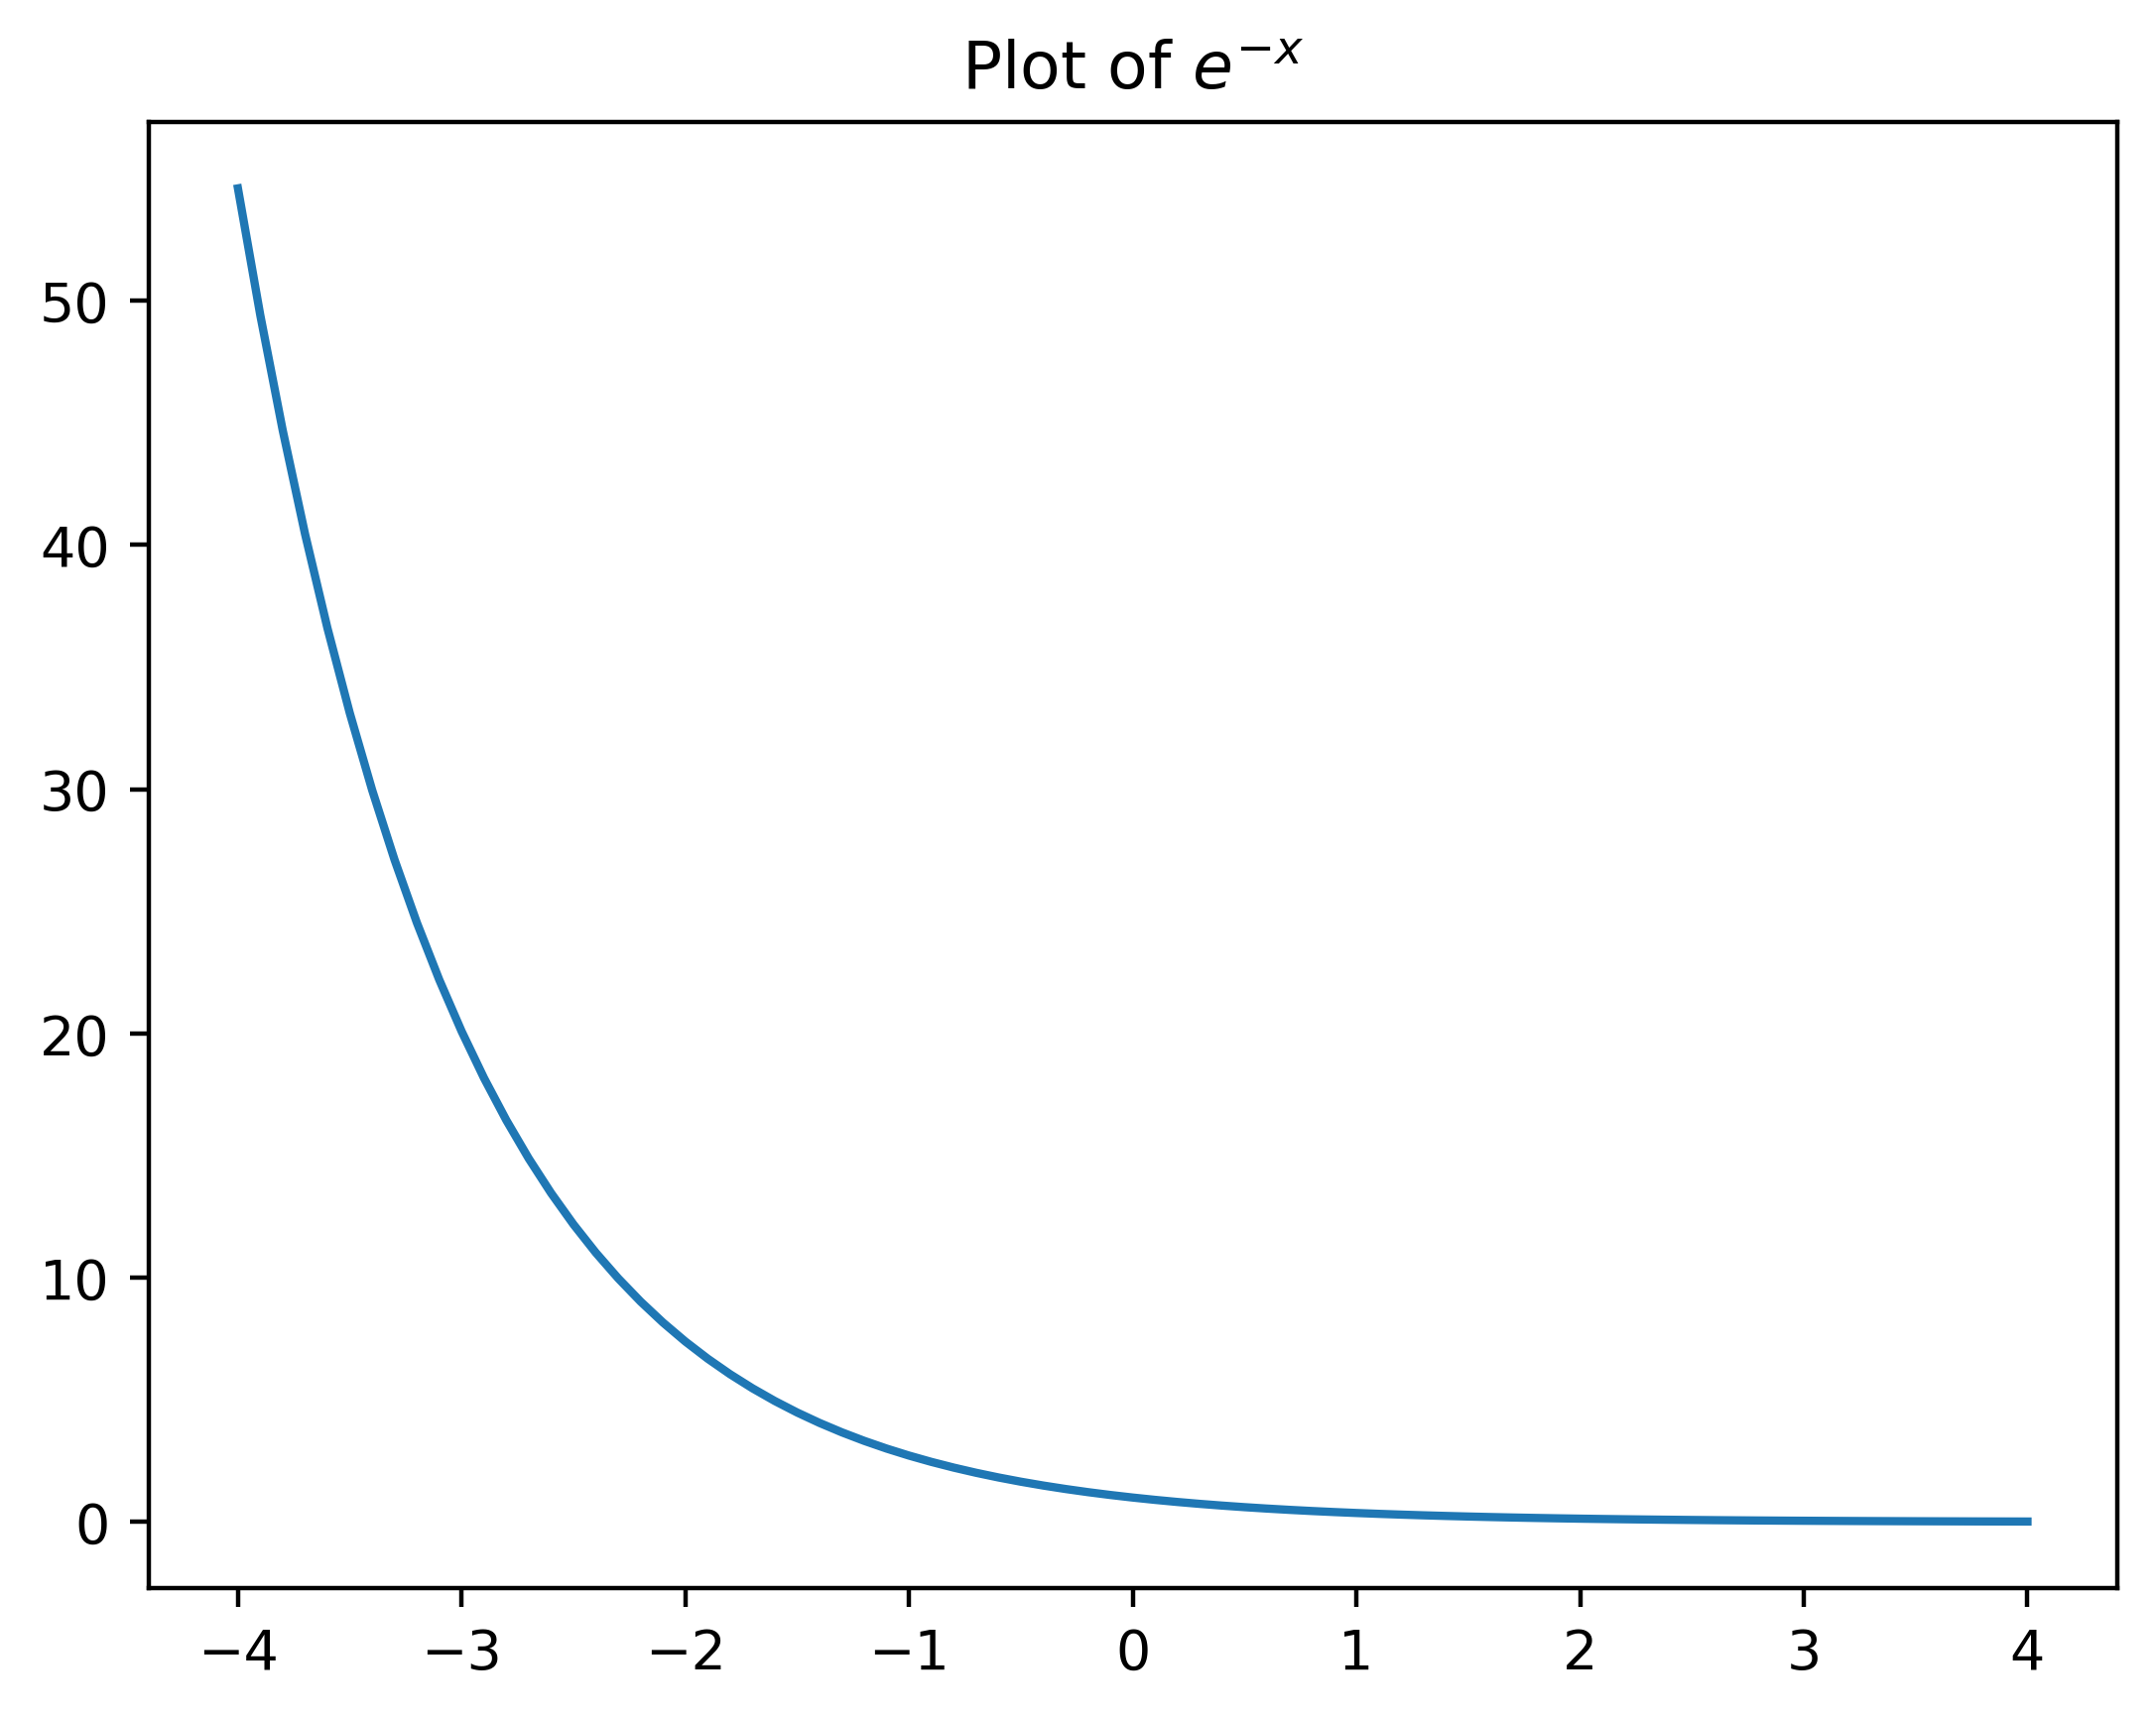

In [24]:
# plot of e^-x
# this function is also never negative
y_exp = np.exp(-x_exp)
plt.plot(x_exp, y_exp)
plt.title("Plot of $e^{-x}$")

In [26]:
# create simgoid function
def sigmoid(x):
    y = 1 / (1 +np.exp(-x))
    return y

0.5


Text(0.5, 1.0, 'The sigmoid function')

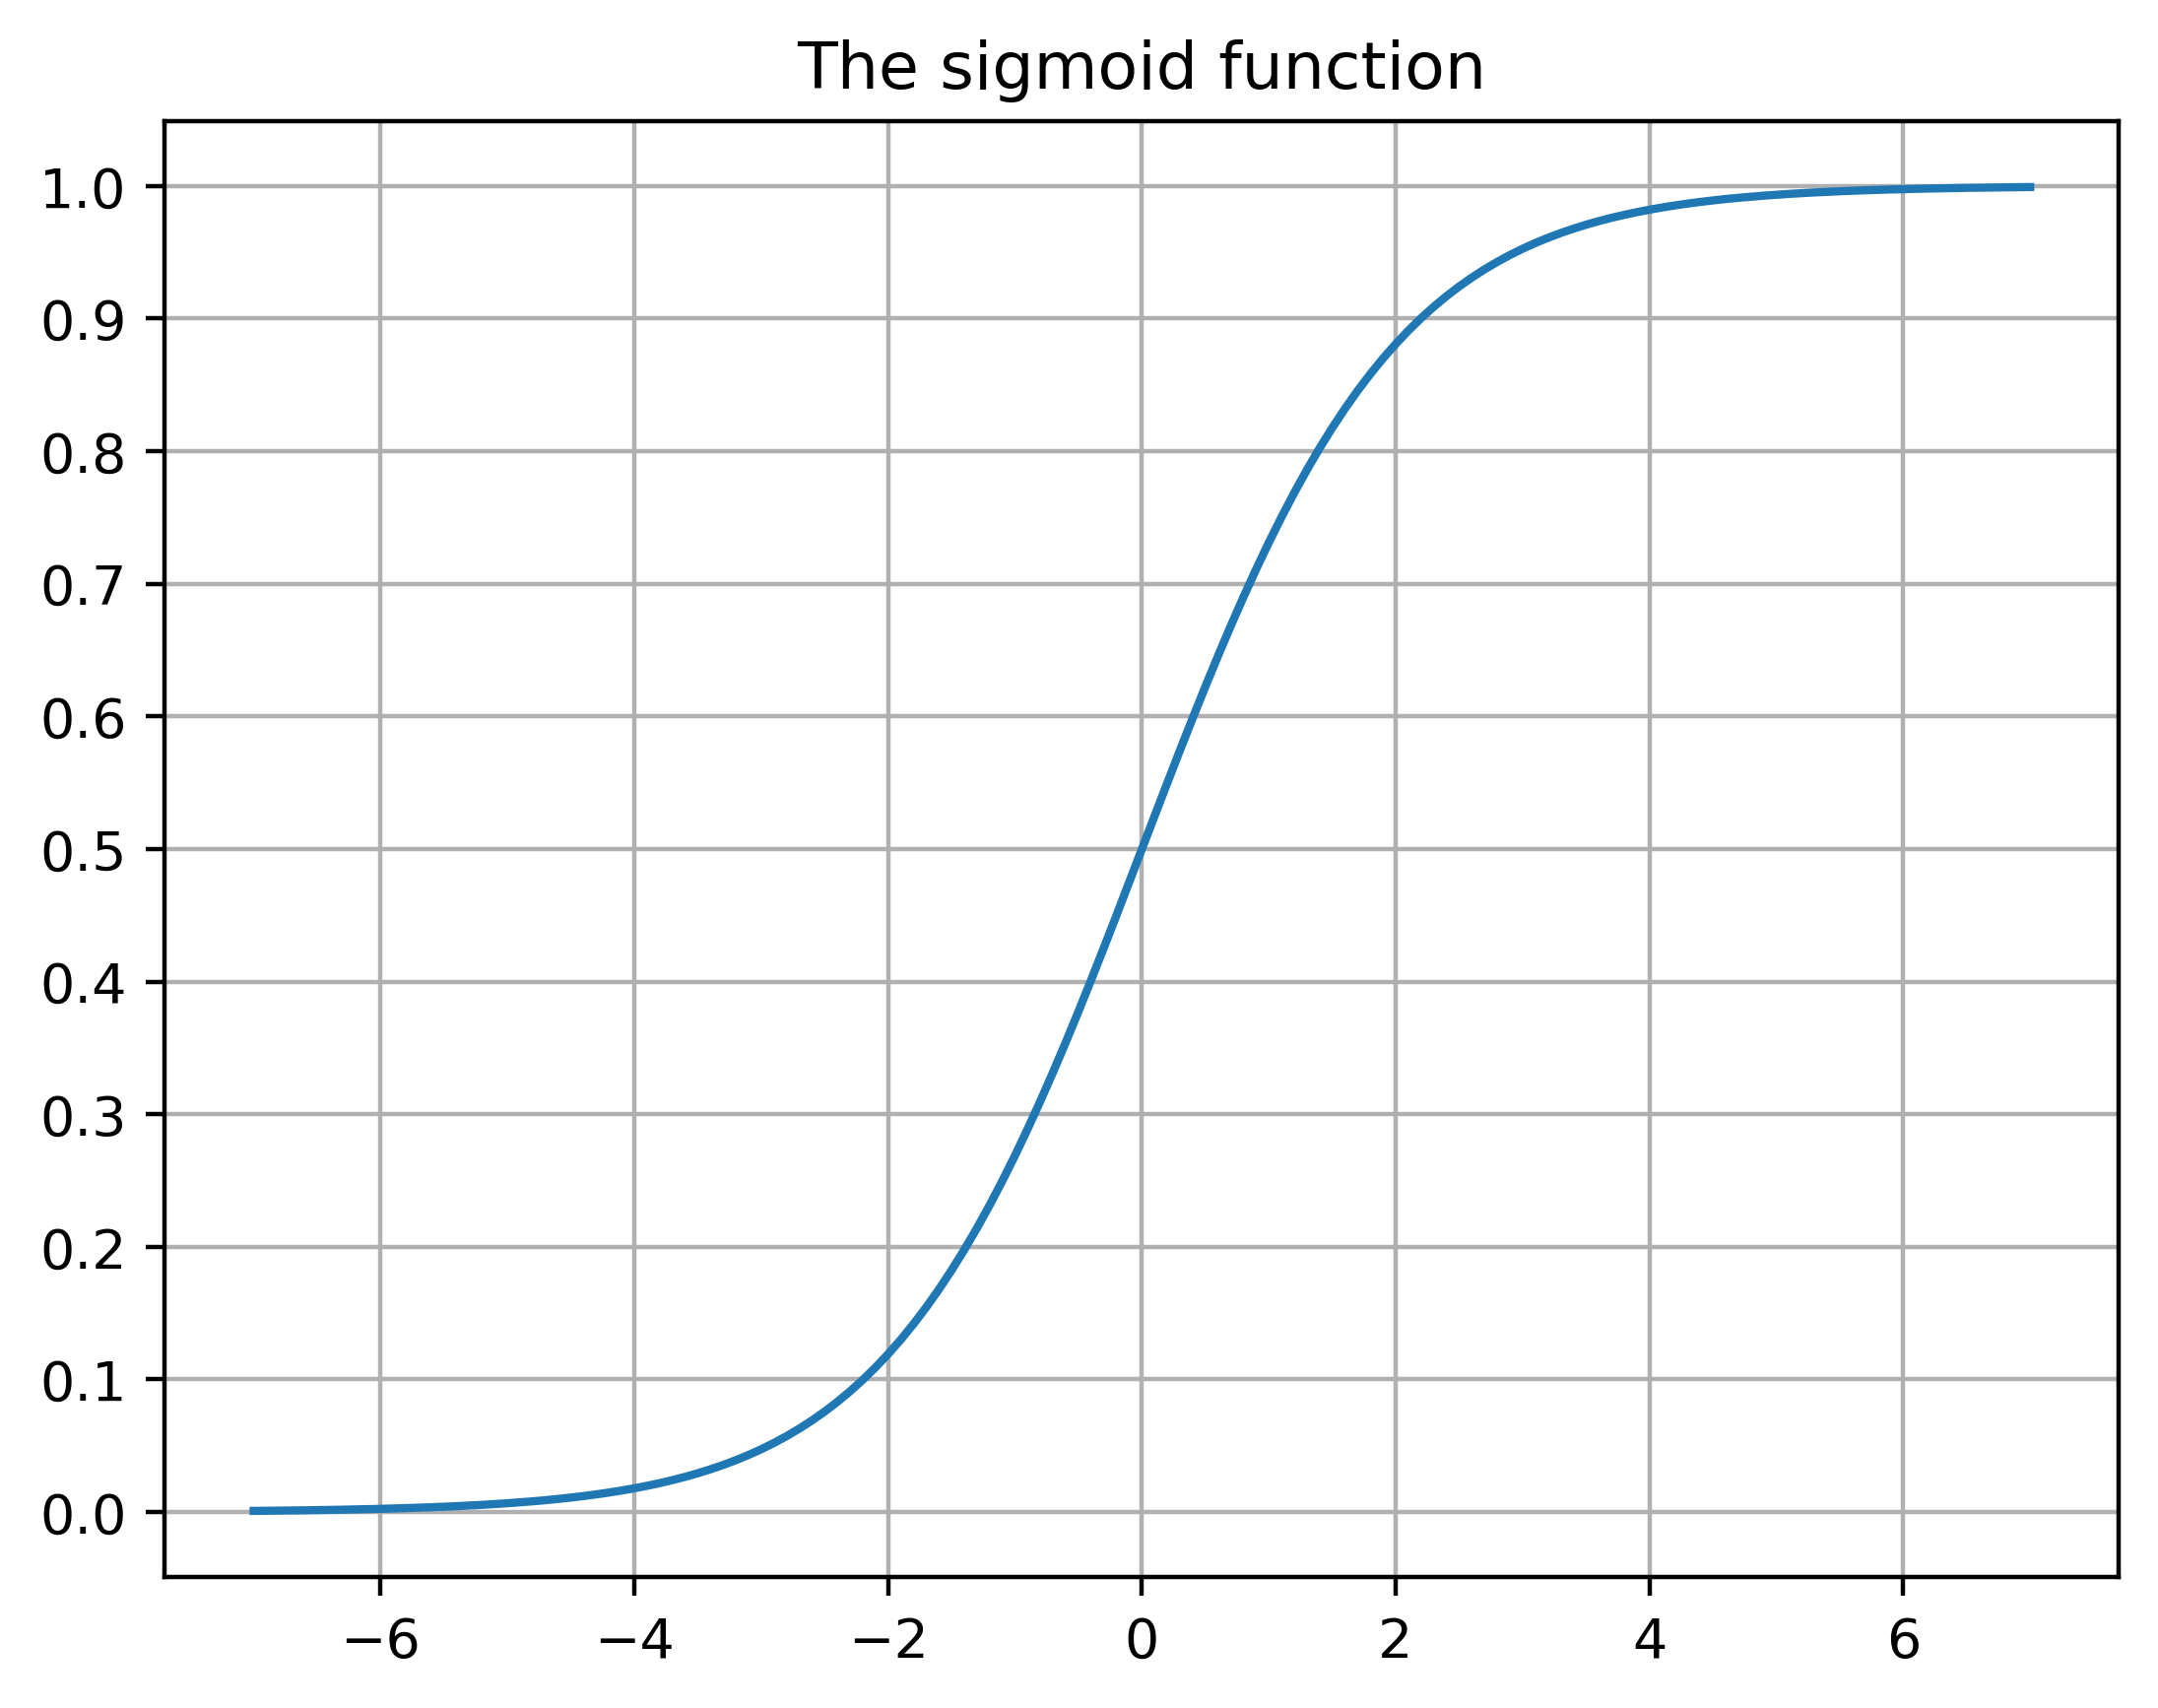

In [29]:
#  plotting sigmoid function
x_sig = np.linspace(-7, 7, 141)
y_sig = sigmoid(x_sig)
print(sigmoid(0))

plt.plot(x_sig, y_sig)
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.title("The sigmoid function")

In [32]:
print(group_by_pay_mean_y)

# p = probabilty of success
# q = probabilty of failure
p = group_by_pay_mean_y["default payment next month"].values
q = 1 - p

print(f"{p=} \n{q=}")

       default payment next month
PAY_1                            
-2                       0.131664
-1                       0.170002
 0                       0.128295
 1                       0.336400
 2                       0.694701
 3                       0.773973
 4                       0.682540
 5                       0.434783
 6                       0.545455
 7                       0.777778
 8                       0.588235
p=array([0.13166397, 0.17000198, 0.12829525, 0.33639988, 0.69470143,
       0.7739726 , 0.68253968, 0.43478261, 0.54545455, 0.77777778,
       0.58823529]) 
q=array([0.86833603, 0.82999802, 0.87170475, 0.66360012, 0.30529857,
       0.2260274 , 0.31746032, 0.56521739, 0.45454545, 0.22222222,
       0.41176471])


In [34]:
odds_ratio = p / q
print(odds_ratio)
log_odds = np.log(odds_ratio)
log_odds

[0.15162791 0.20482215 0.14717742 0.50693161 2.27548209 3.42424242
 2.15       0.76923077 1.2        3.5        1.42857143]


array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [35]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

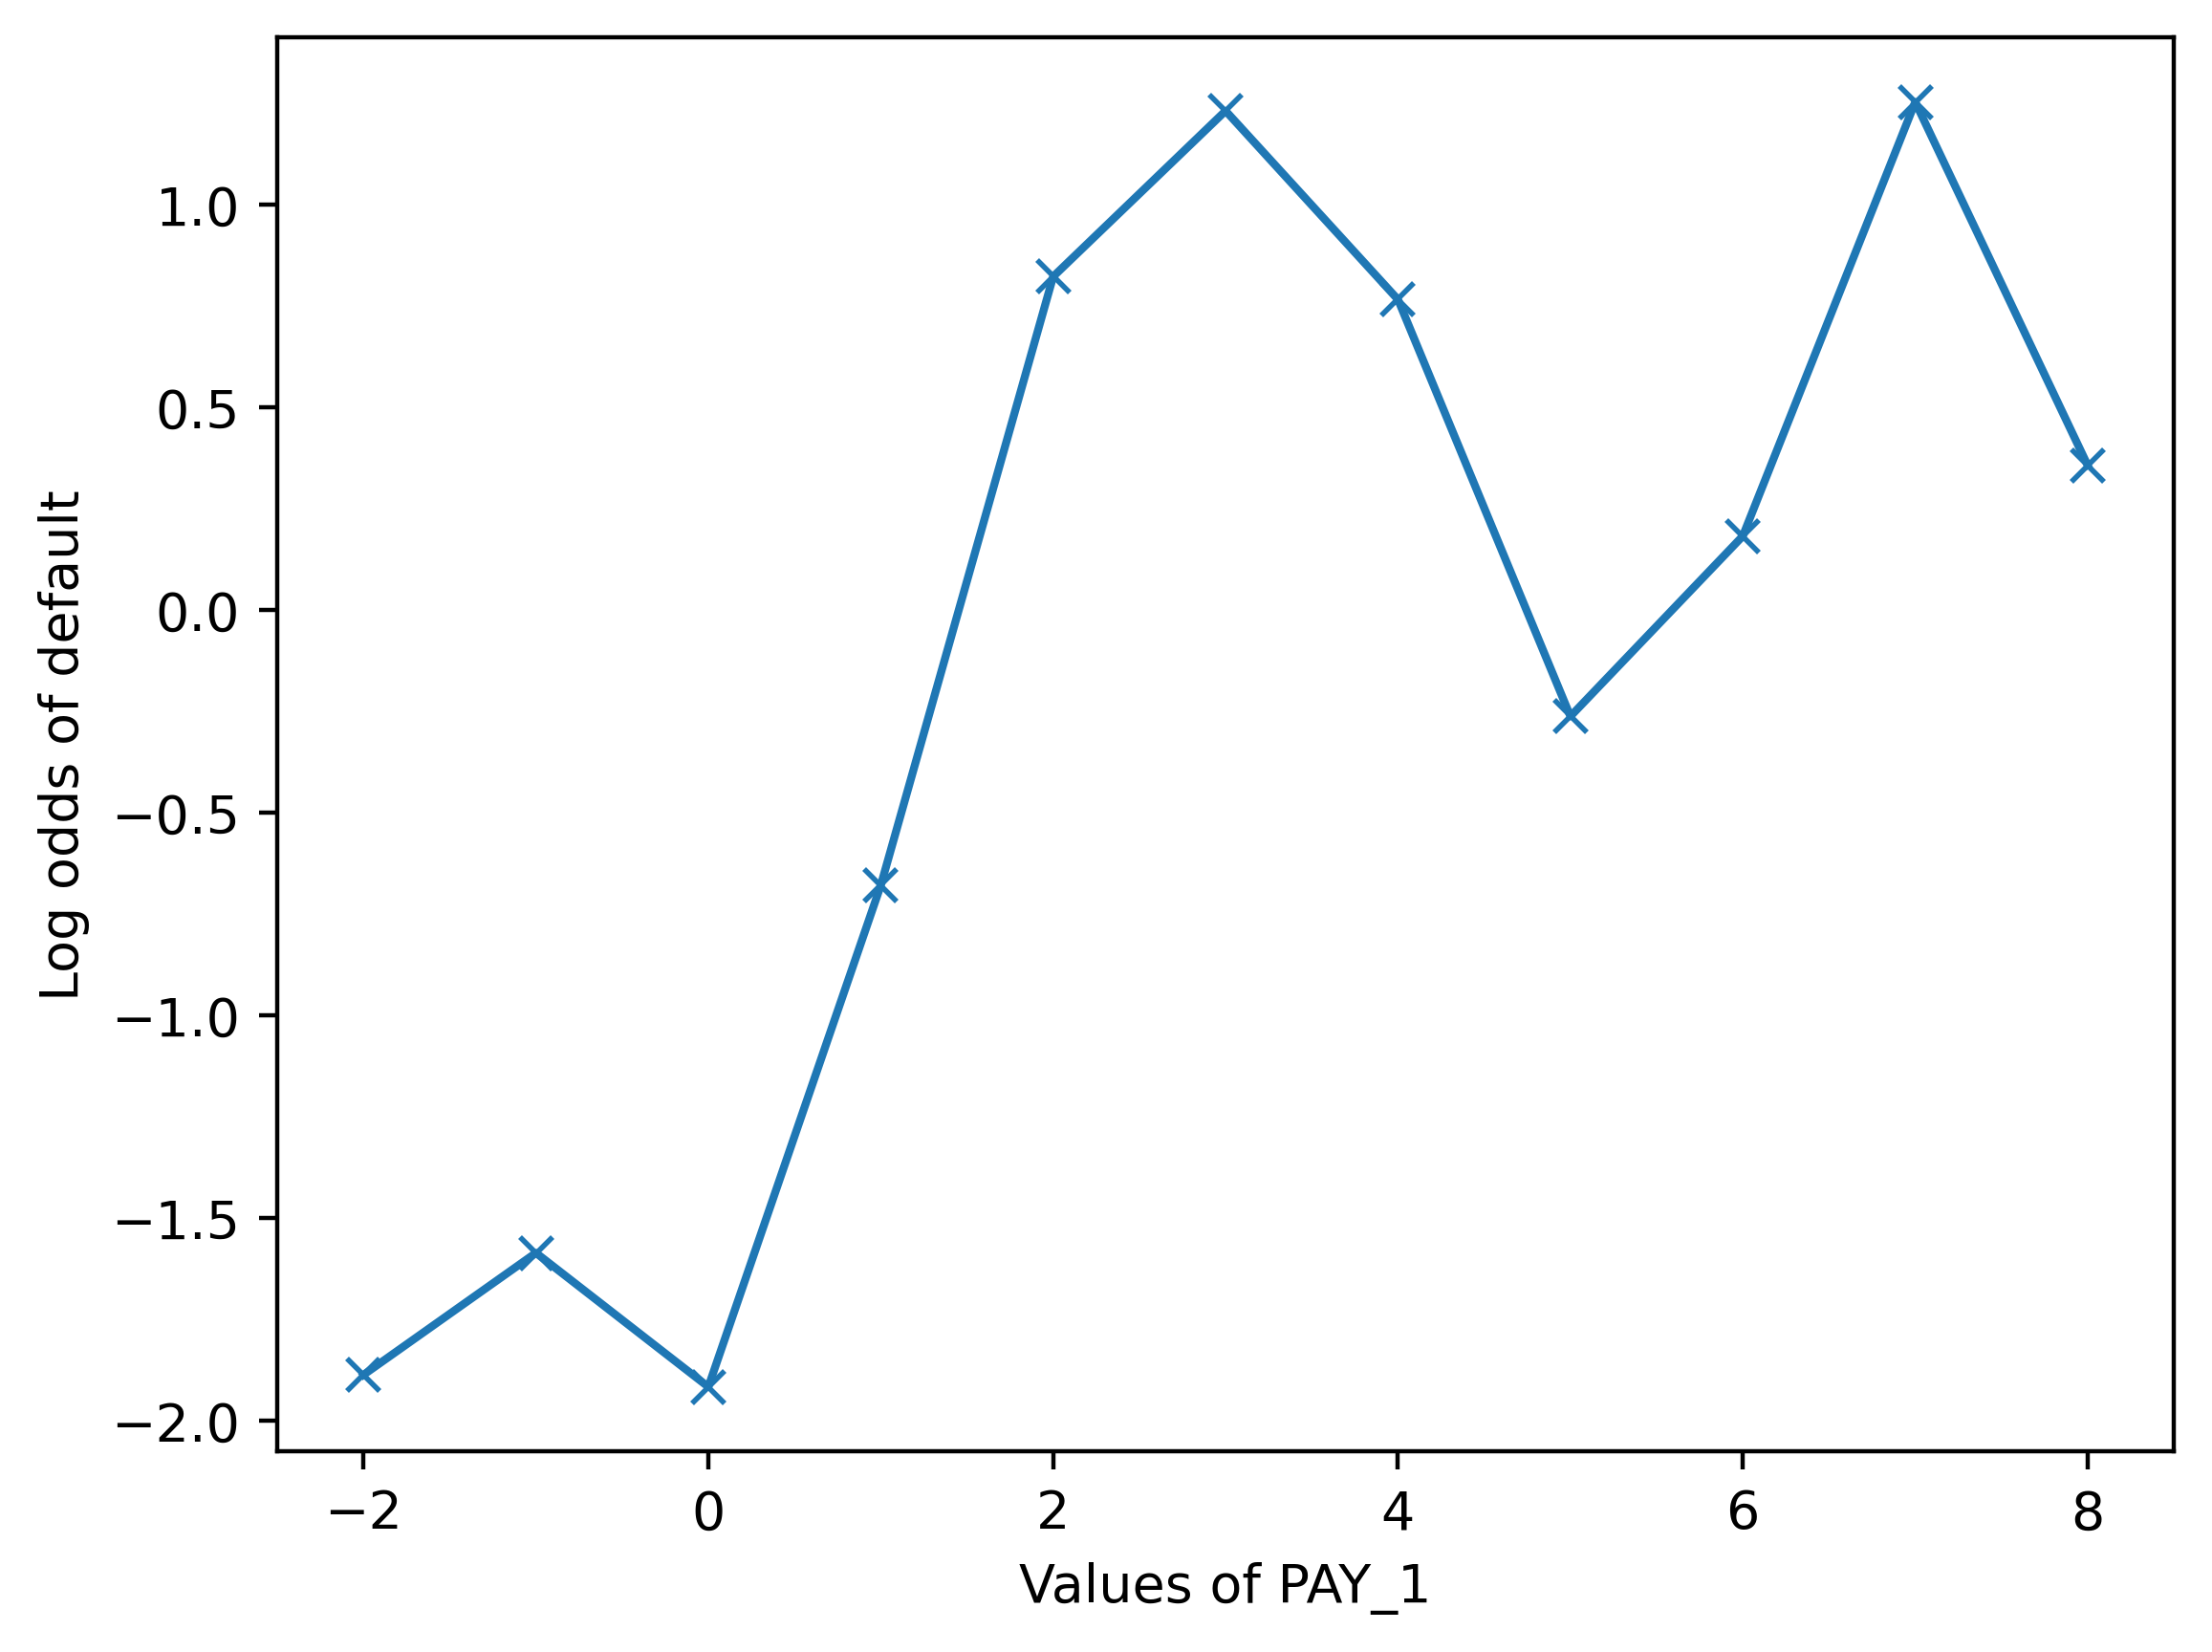

In [36]:
plt.plot(group_by_pay_mean_y.index, log_odds, "-x")
plt.ylabel("Log odds of default")
plt.xlabel("Values of PAY_1")

### Limit of the linear decision of the logistic regression

In [37]:
# create 2 characteristics x1 and x2
np.random.seed(seed=6)
x_1_pos = np.random.uniform(low=1, high=7, size=(20, 1))
print(x_1_pos[:3])

x_1_neg = np.random.uniform(low=3, high=10, size=(20, 1))
print(x_1_neg[:3])

x_2_pos = np.random.uniform(low=1, high=7, size=(20, 1))
print(x_2_pos[:3])

x_2_neg = np.random.uniform(low=3, high=10, size=(20, 1))
print(x_2_neg[:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


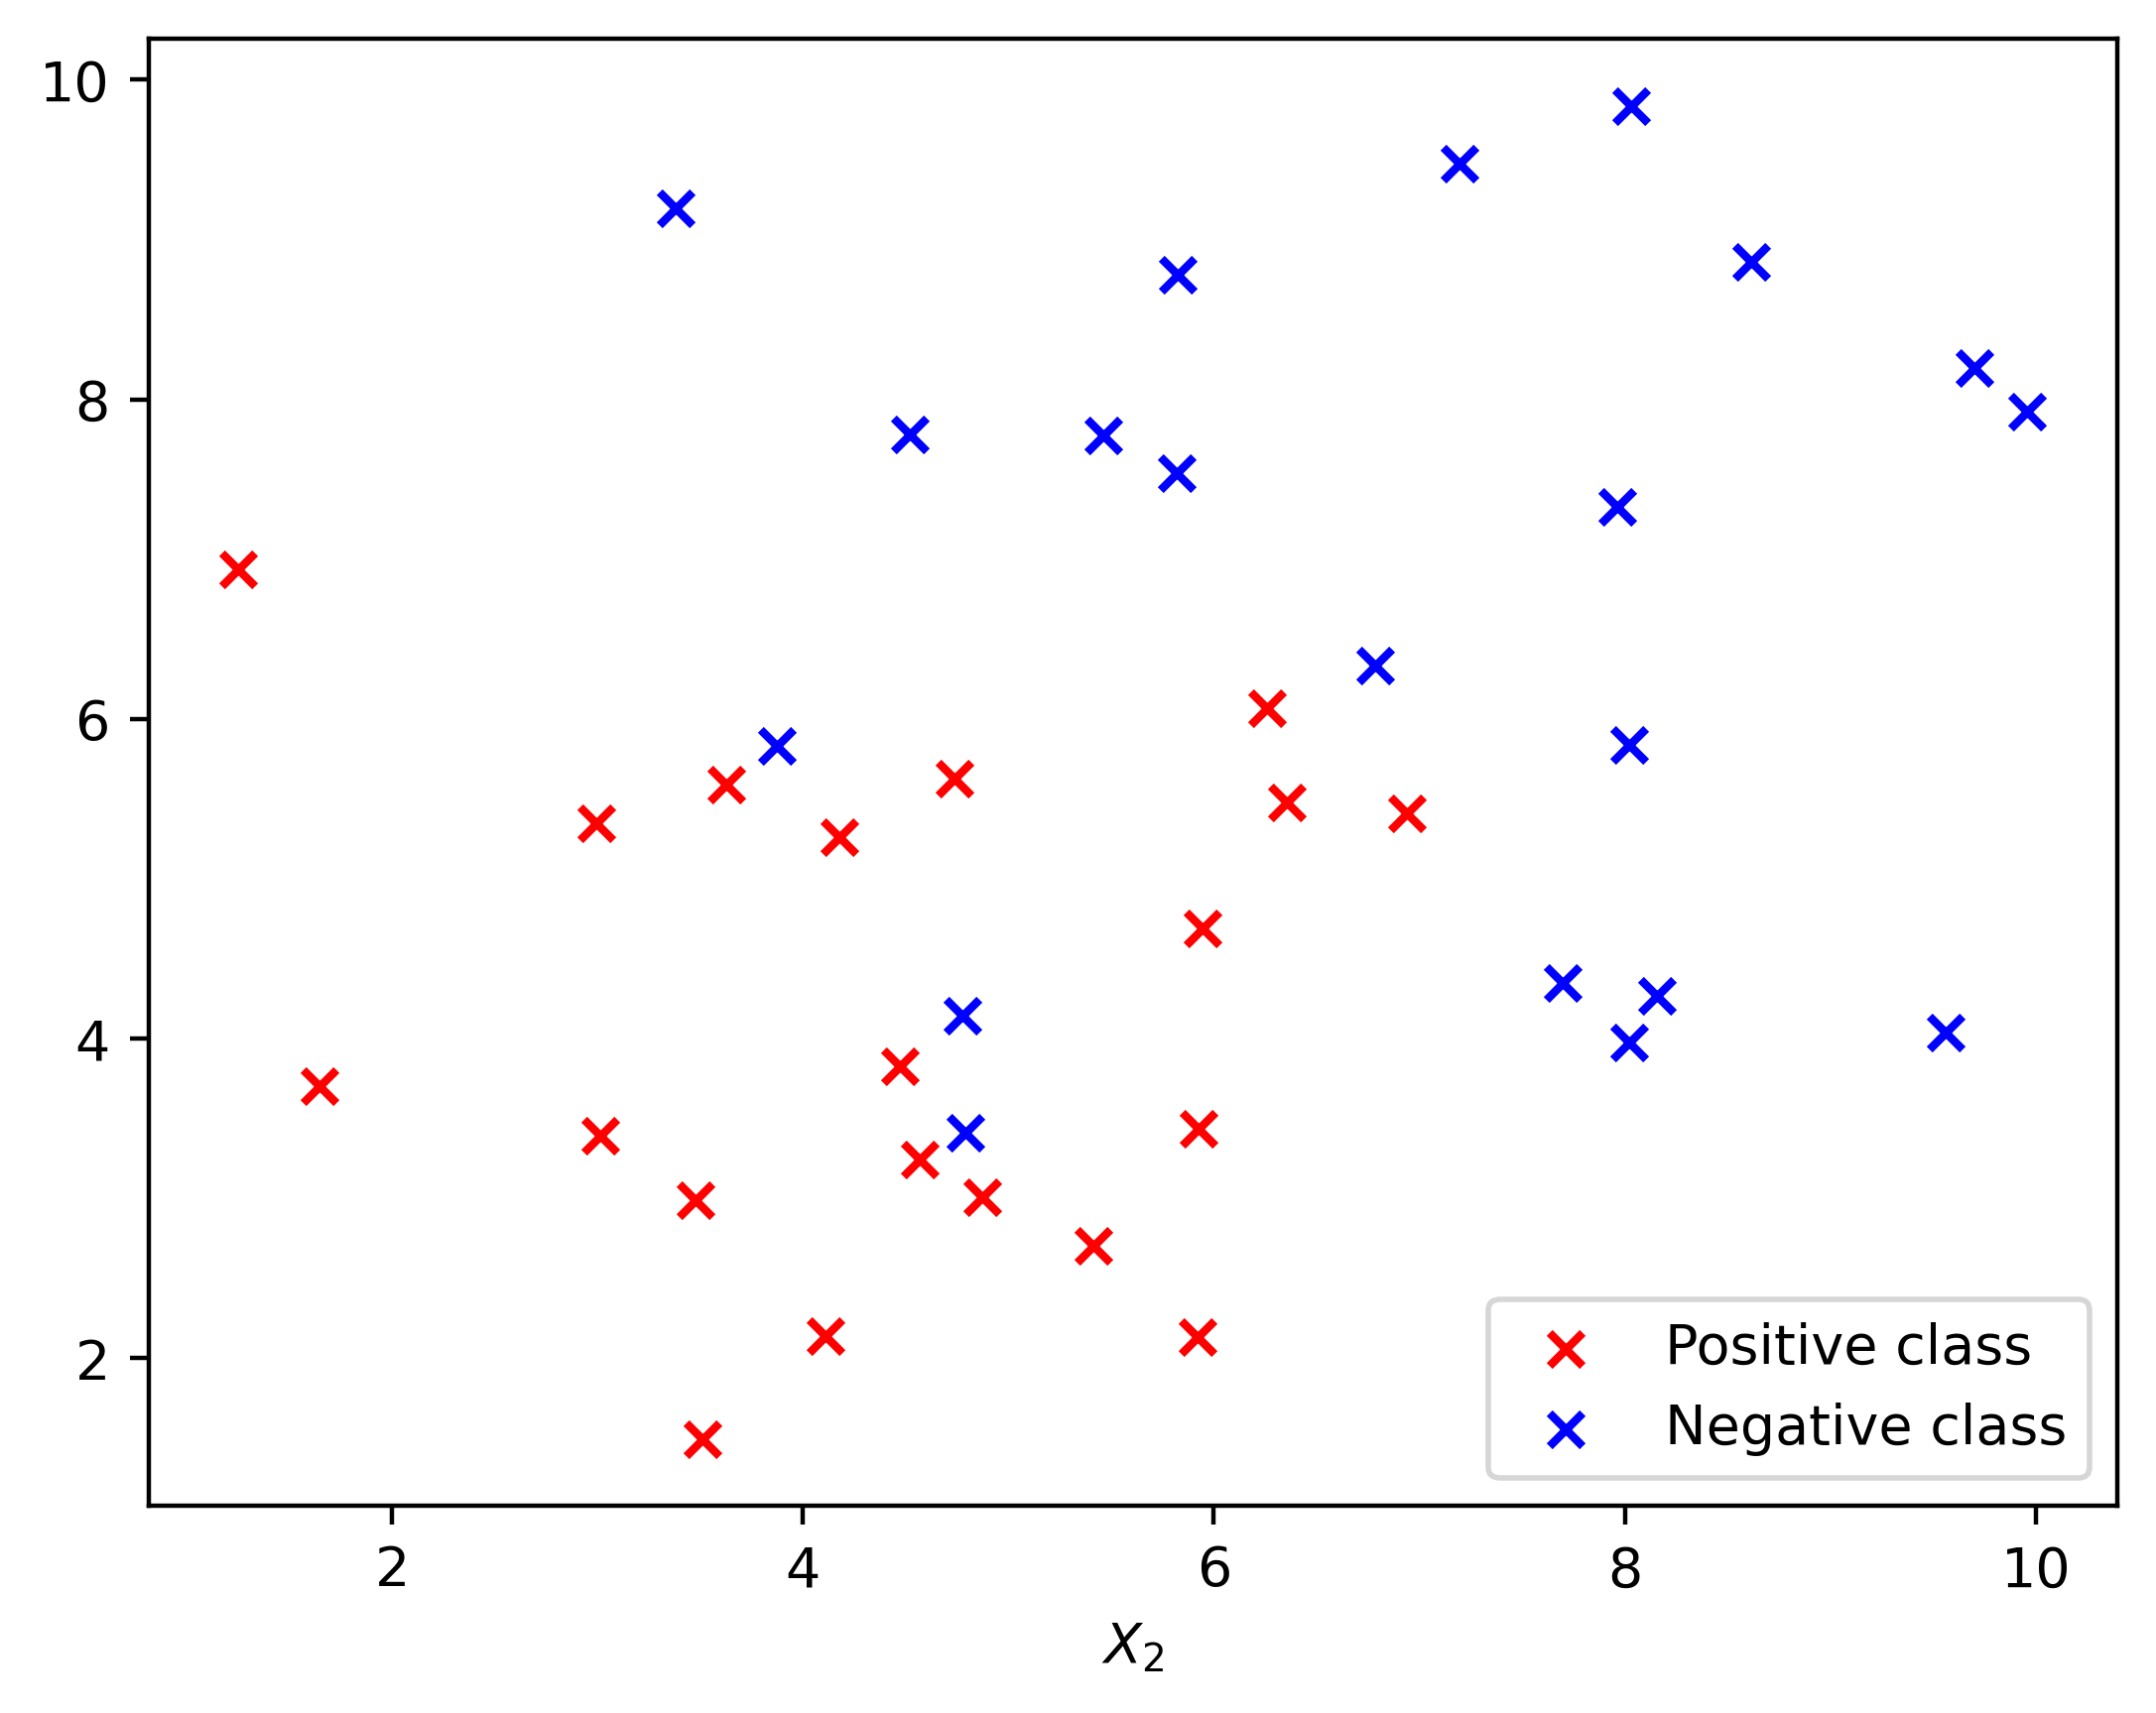

In [38]:
plt.scatter(x_1_pos, x_2_pos, color="red", marker="x")
plt.scatter(x_1_neg, x_2_neg, color="blue", marker="x")
plt.xlabel("$X_1$")
plt.xlabel("$X_2$")
plt.legend(["Positive class", "Negative class"])

In [39]:
# create a matrix 40x2
x = np.block([[x_1_pos, x_2_pos], [x_1_neg, x_2_neg]])
print(x.shape)
print(x[:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [42]:
# create a vertical stack with 20 1's and 20 0's
y = np.vstack((np.ones((20, 1)), np.zeros((20, 1)))).reshape(40,)
print(y[:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [43]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver="liblinear")
example_lr

LogisticRegression(solver='liblinear')

In [45]:
# the positives samples are the first 20 number, the others are negative
example_lr.fit(x, y)
y_pred = example_lr.predict(x)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter] == 0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

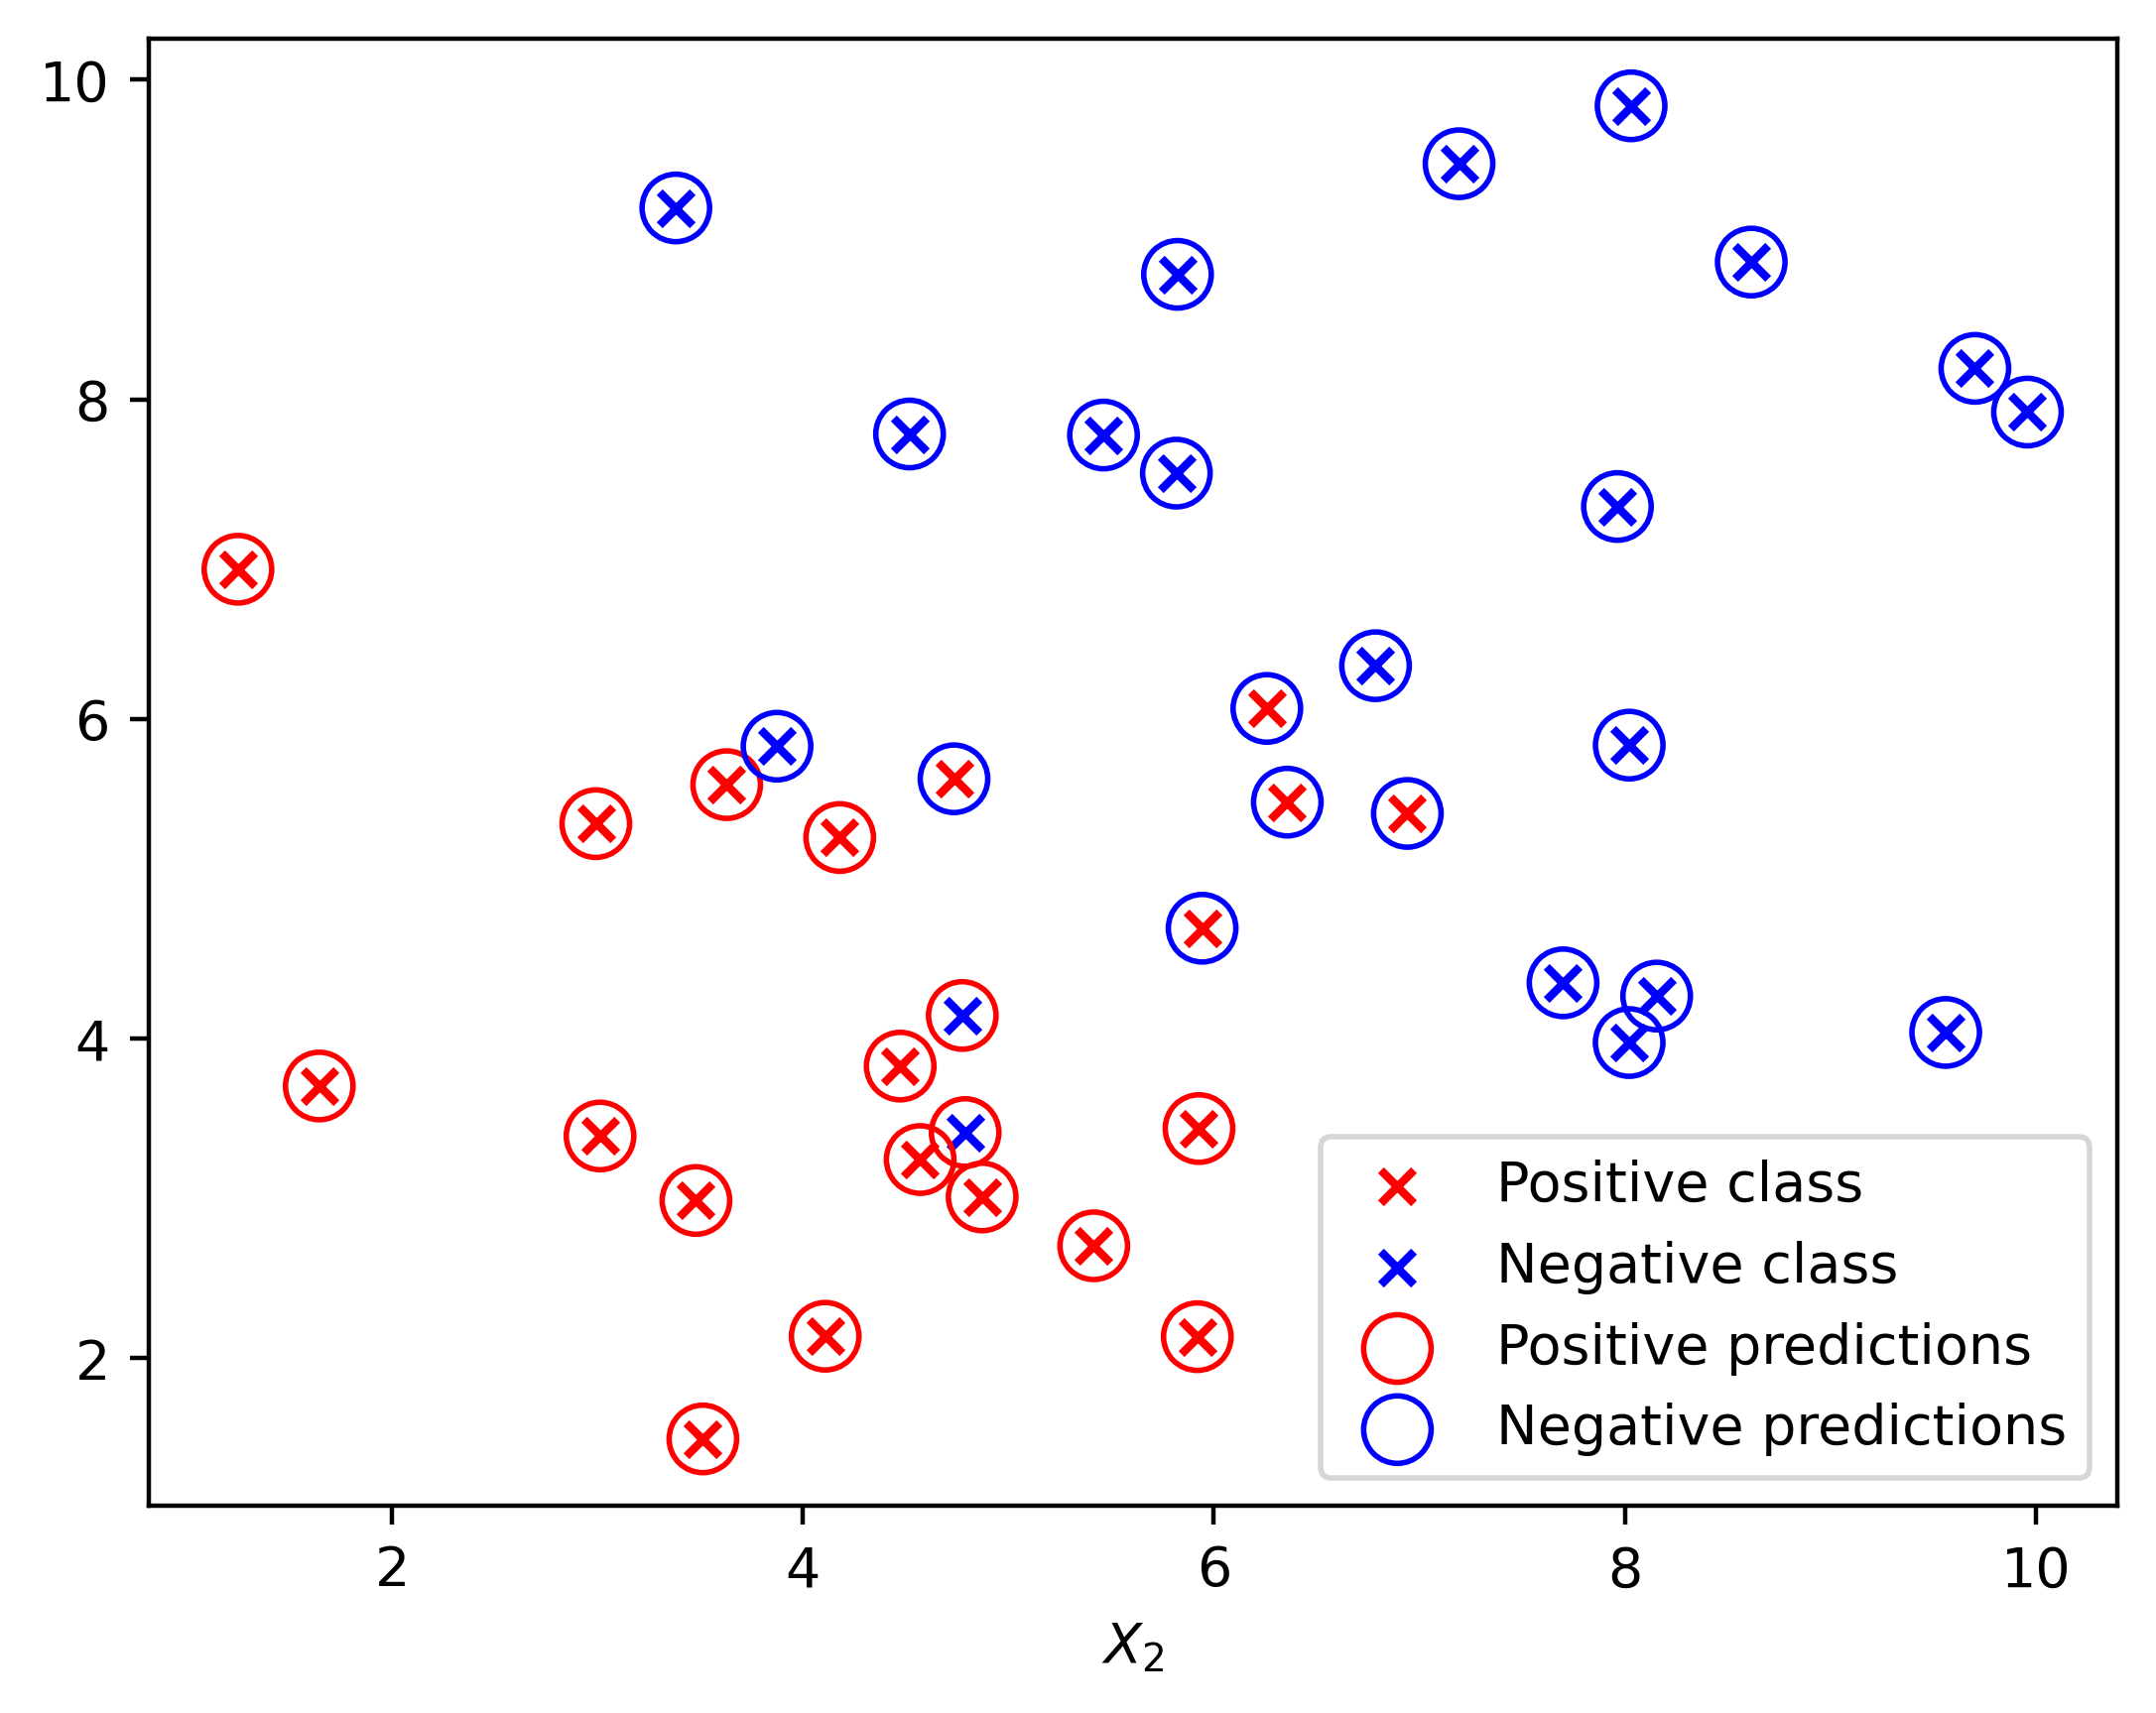

In [46]:
plt.scatter(x_1_pos, x_2_pos, color="red", marker="x")
plt.scatter(x_1_neg, x_2_neg, color="blue", marker="x")
plt.scatter(x[positive_indices, 0], x[positive_indices, 1], s=150, marker="o",
           edgecolors="red", facecolors="none")
plt.scatter(x[negative_indices, 0], x[negative_indices, 1], s=150, marker="o",
           edgecolors="blue", facecolors="none")
plt.xlabel("$X_1$")
plt.xlabel("$X_2$")
plt.legend(["Positive class", "Negative class", "Positive predictions", "Negative predictions"])

In [48]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

theta_0 = example_lr.intercept_
theta_0

-0.20245058016285844 -0.25336423626773213


array([2.25479161])

In [49]:
x_1_decision_boundary = np.array([0, 10])
x_2_decision_boundary = - (theta_1 / theta_2) * x_1_decision_boundary - (theta_0 / theta_2)
print(x_1_decision_boundary, x_2_decision_boundary)

[ 0 10] [8.8994076  0.90891205]


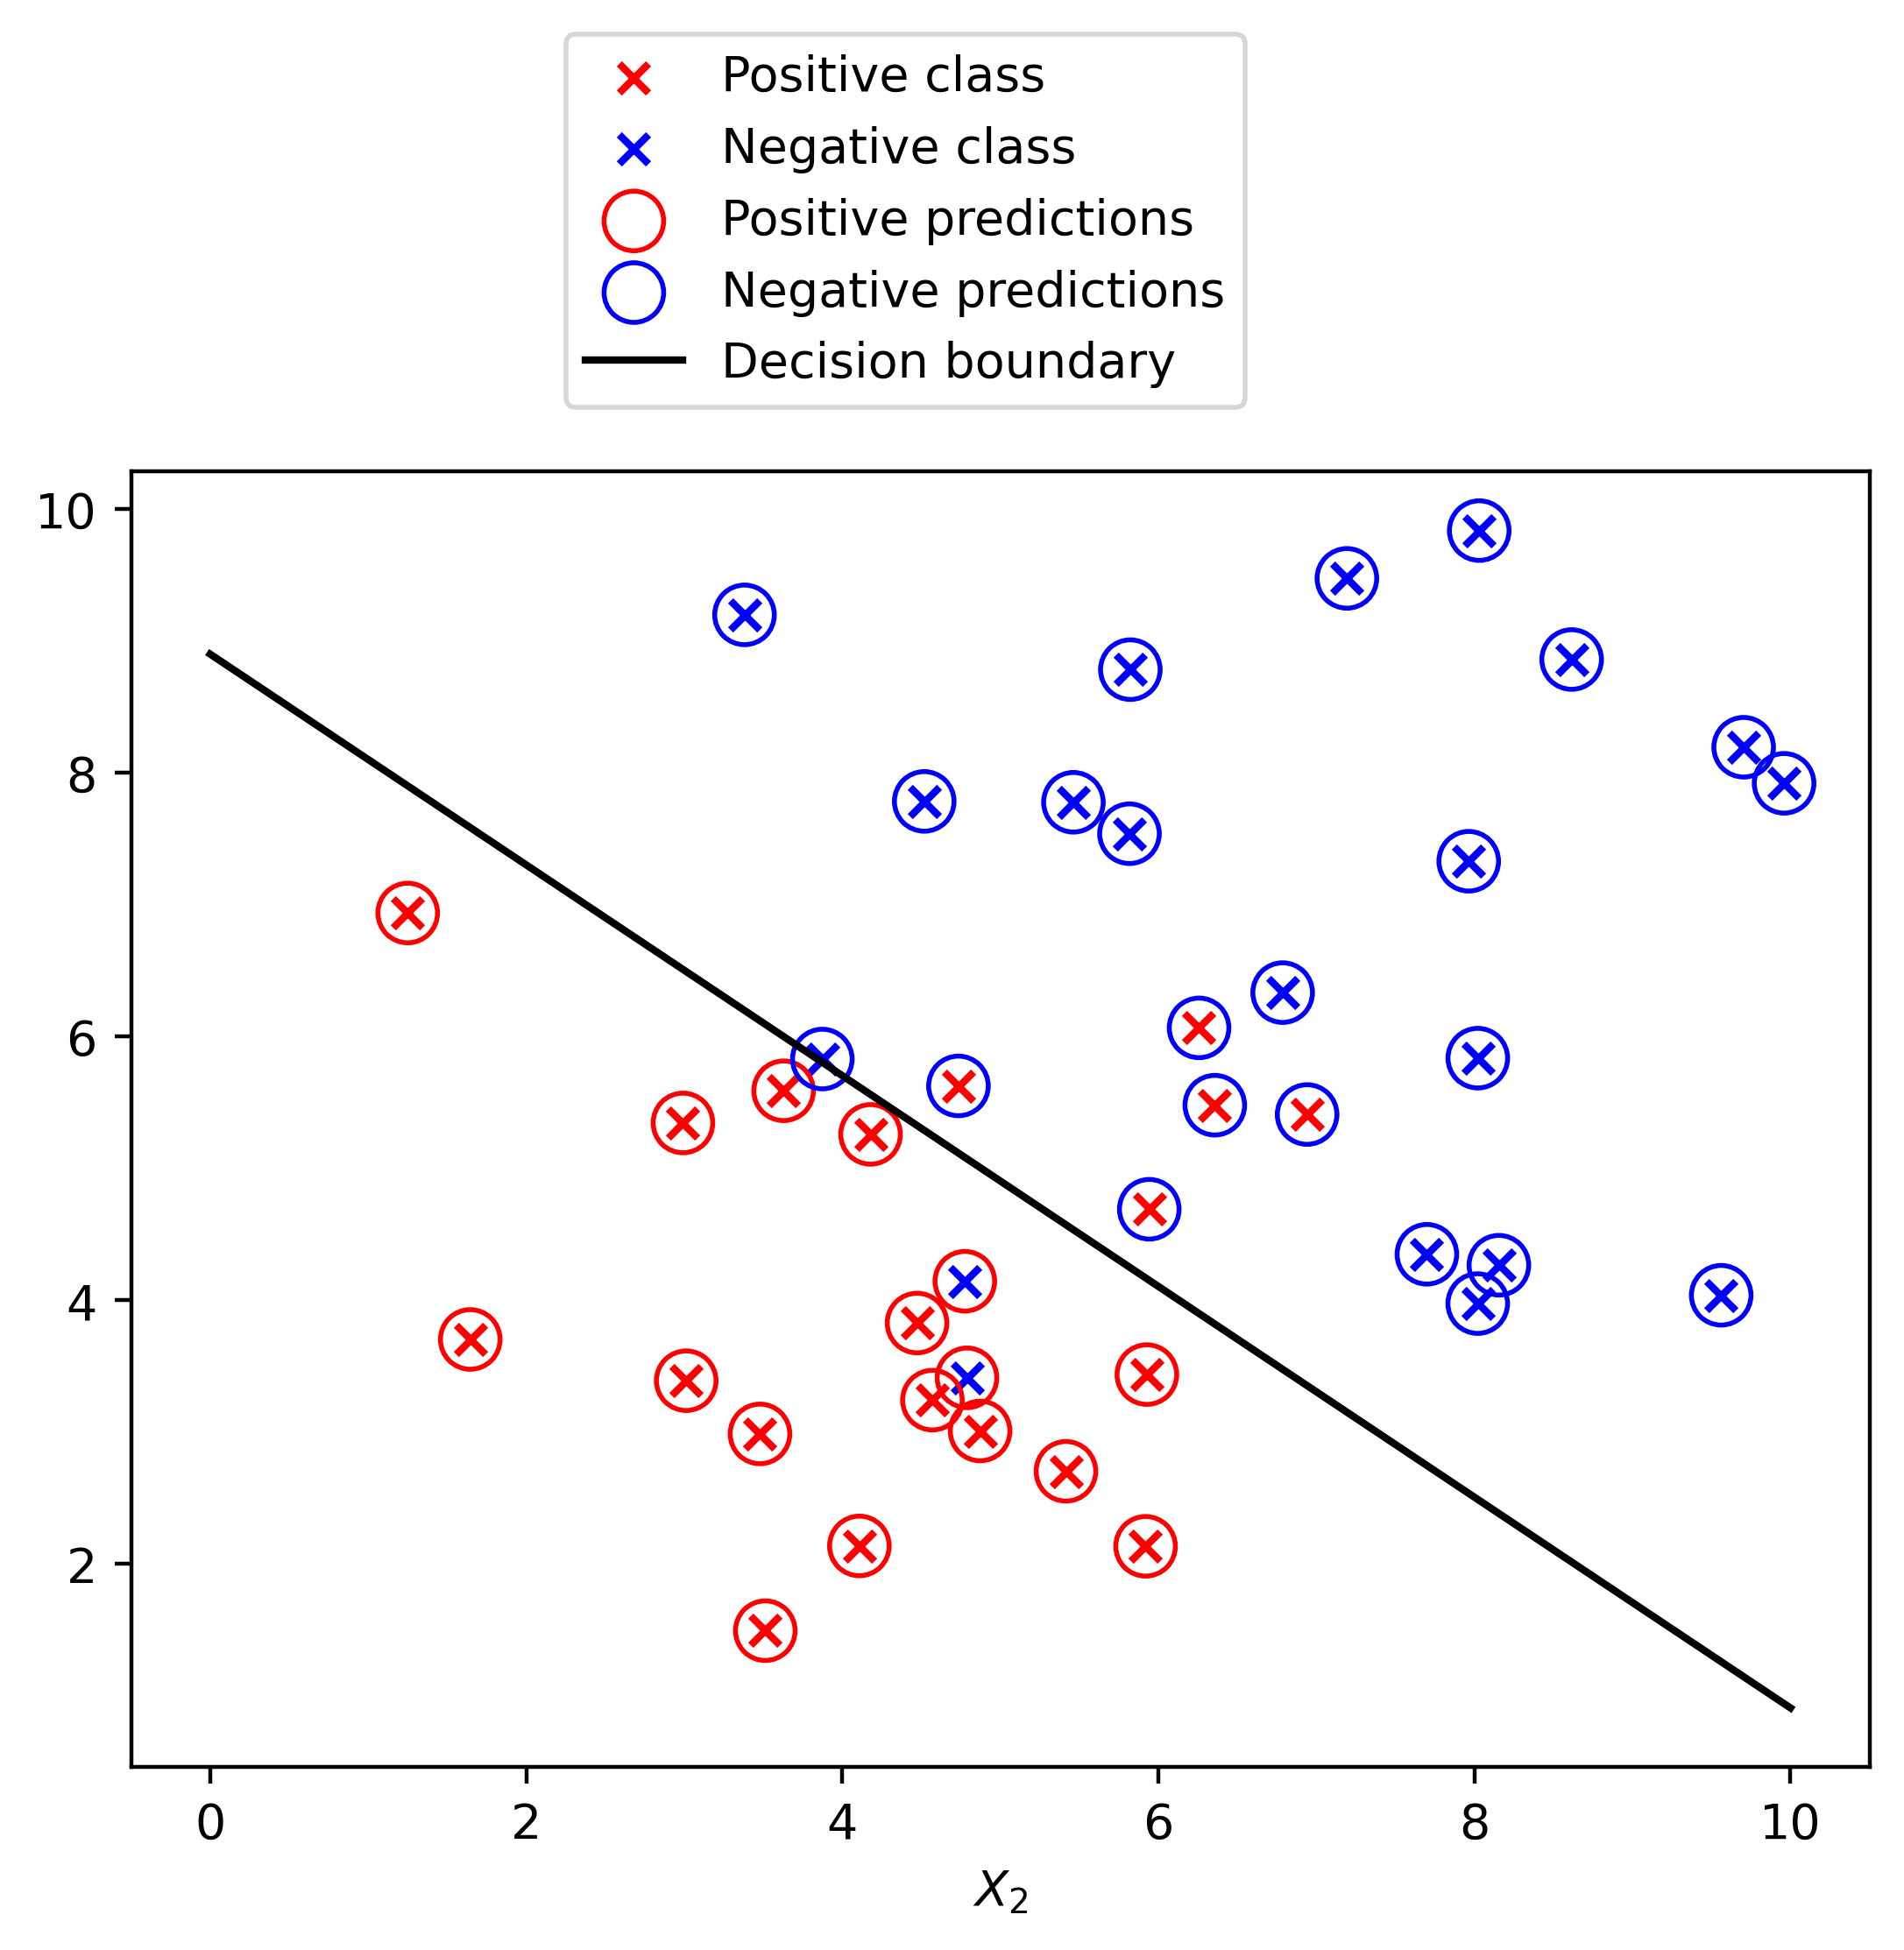

In [52]:
# plot of the limit decision
pos_true = plt.scatter(x_1_pos, x_2_pos, color="red", marker="x",
                      label="Positive class")
neg_true = plt.scatter(x_1_neg, x_2_neg, color="blue", marker="x",
                      label="Negative class")
pos_pred = plt.scatter(x[positive_indices, 0], x[positive_indices, 1], s=150,
                      marker="o", edgecolors="red", facecolors="none", label="Positive predictions")
neg_pred = plt.scatter(x[negative_indices, 0], x[negative_indices, 1], s=150,
                      marker="o", edgecolors="blue", facecolors="none", label="Negative predictions")
dec = plt.plot(x_1_decision_boundary, x_2_decision_boundary, "k-", label="Decision boundary")
plt.xlabel("$X_1$")
plt.xlabel("$X_2$")
plt.legend(loc=[0.25, 1.05])